# Initialize

## Initialization

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
from jupyterthemes import jtplot
jtplot.reset()

fig_dir = "figures/"
paper_fig_dir = "C:\\Users\\Riccardo Torre\\Dropbox\\Work\\04_Projects\\Git\\GitHub\\NormalizingFlows\\NormalizingFlows\\papers\\NFHD\\figures\\" 

## Useful functions

In [2]:
def build_data_from_runs(path,save_file_name,results="succeeded"):
    print("Processing path", path,"for",results,"runs.")
    runs_list=[[int(i.replace("run_","")),os.path.abspath(os.path.join(os.path.join(path,i),"results.txt"))] for i in os.listdir(path) if ("run" in i and os.path.isdir(os.path.abspath(os.path.join(path,i))))]
    runs_list.sort()
    if os.path.exists(runs_list[0][1]):
        data=pd.read_csv(runs_list[0][1])
        i=1
        j=0
    else:
        print("No results available for run",runs_list[0][1])
        data=pd.DataFrame()
        i=0
        j=0
    for run in runs_list[1:]:
        if os.path.exists(run[1]):
            tmp = pd.read_csv(run[1]).pop("time")
            if 'nan' in str(tmp) or "failed" in str(tmp):
                if results == "all":
                    data=pd.concat([data,pd.read_csv(run[1])])
                else:
                    pass
            else:
                data=pd.concat([data,pd.read_csv(run[1])])
            i=i+1
        else:
            j=j+1
            print("No results available for run",run[0])
    data = data.reset_index(drop=True).replace("failed","nan")
    print("Succesfully imported", i, "runs (failed to import",j,"runs).")
    save_path = os.path.abspath(os.path.join(path,save_file_name))
    data.to_csv(save_path,index=False)
    print("Succesfully saved data to file", save_path)
    return data

In [3]:
def extract_lines(df_bests,bij,corr,metric):
    result = []
    for df in df_bests:
        tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
        if tmp != []:
            result.append(tmp)
    return np.array(result)

# Results for uncorrelated mixture

## Check, fix, import results

### Check and fix results

In [11]:
uncorrelated_results_paths = {"MAFN": "UMoG/results/MAFN/",
                             "RealNVPN": "UMoG/results/RealNVPN/",
                             "MsplineN": "UMoG/results/MsplineN/",
                             "CsplineN": "UMoG/results/CsplineN/"
                            }

In [12]:
for res in uncorrelated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path UMoG/results/MAFN/ for succeeded runs.
Succesfully imported 32 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\UMoG\results\MAFN\log_file_eternal_final.txt
Processing path UMoG/results/RealNVPN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\UMoG\results\RealNVPN\log_file_eternal_final.txt
Processing path UMoG/results/MsplineN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\UMoG\results\MsplineN\log_file_eternal_final.txt
Processing path UMoG/results/CsplineN/ for succeeded runs.
No results available for run 93
Succesfully

### Import results

In [13]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in uncorrelated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_uncorrelated = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_uncorrelated = df_uncorrelated[~(df_uncorrelated == 'failed').any(axis=1)]
len(df_uncorrelated)

141

## Correlation of metrics

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


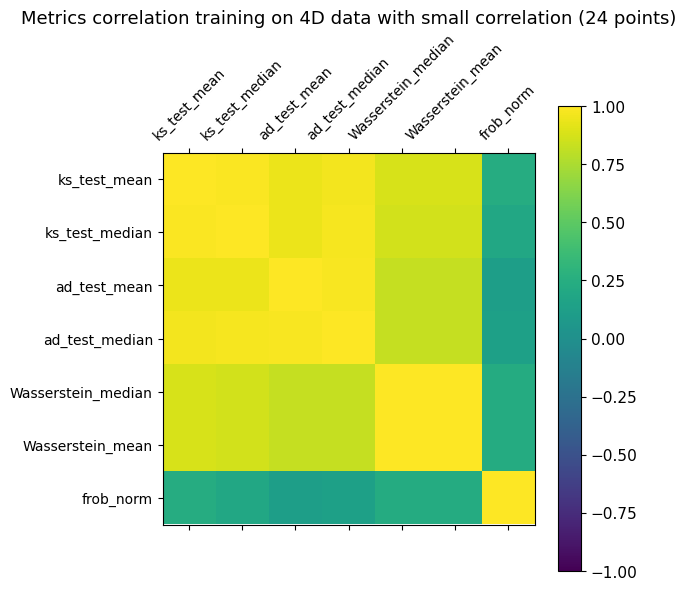

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


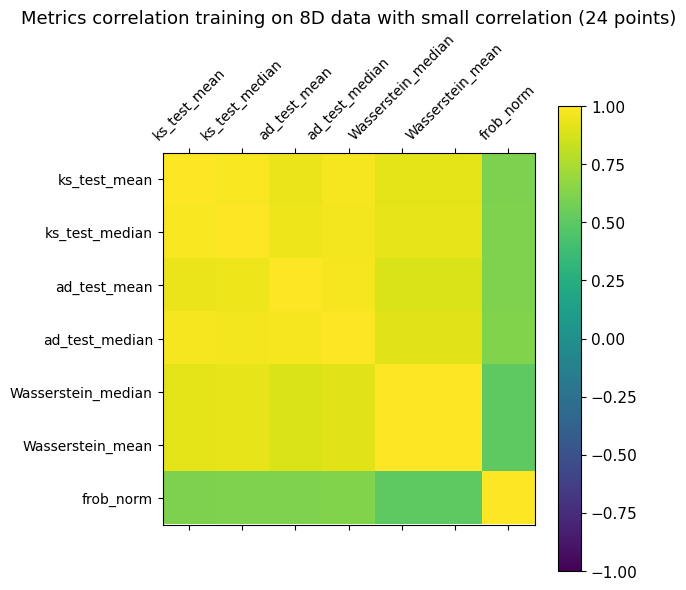

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


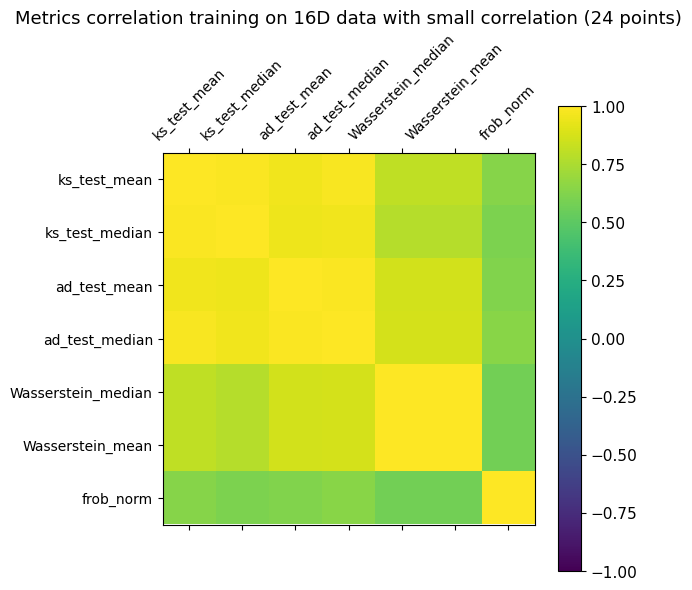

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


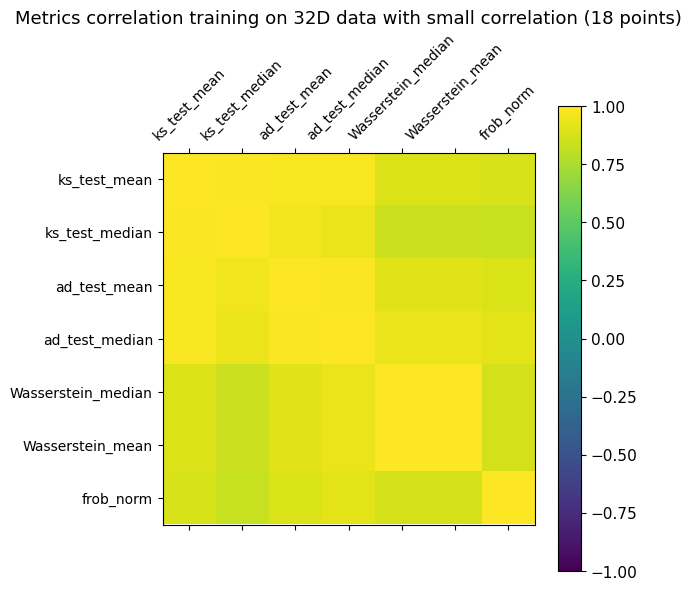

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


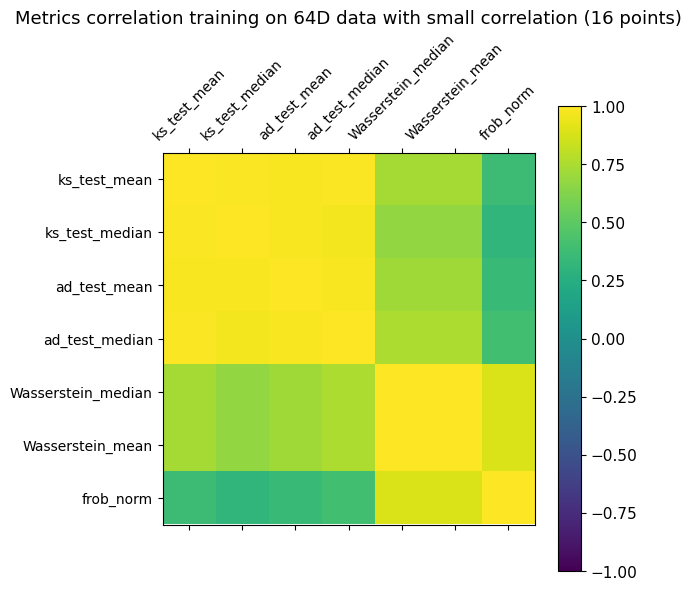

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


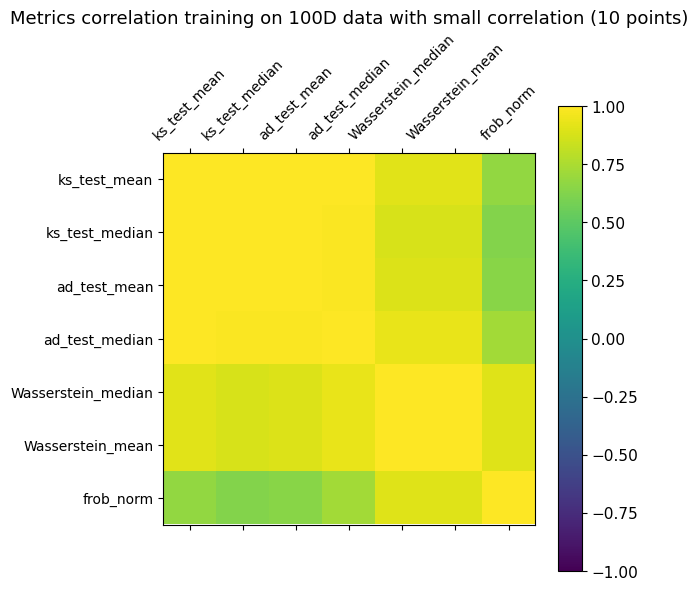

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


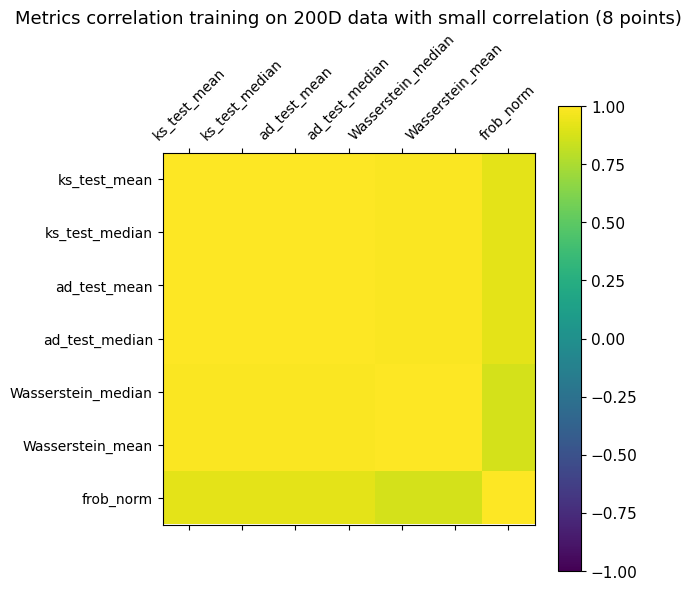

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


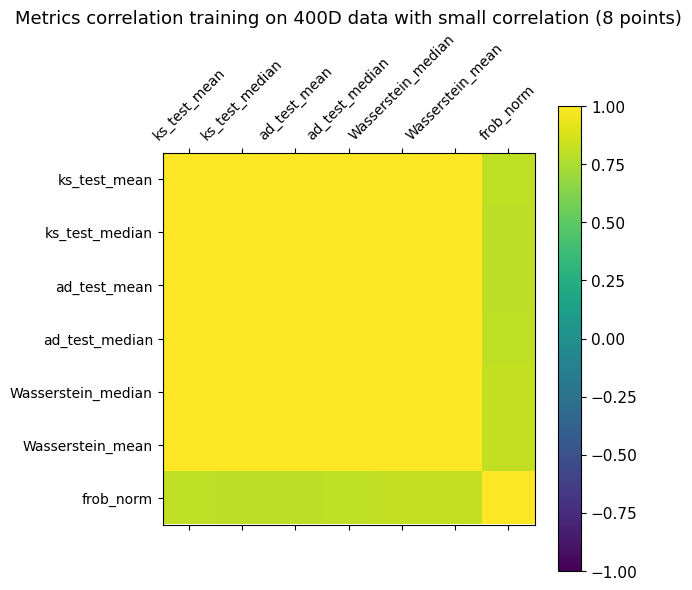

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


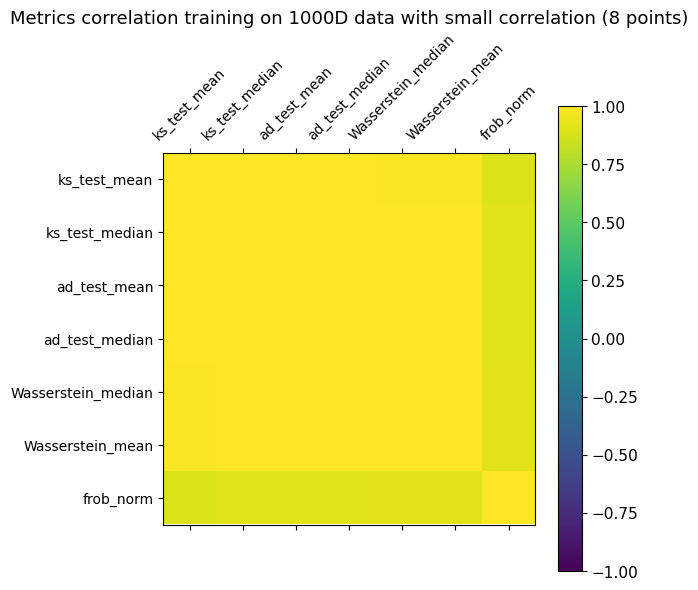

In [11]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with small correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


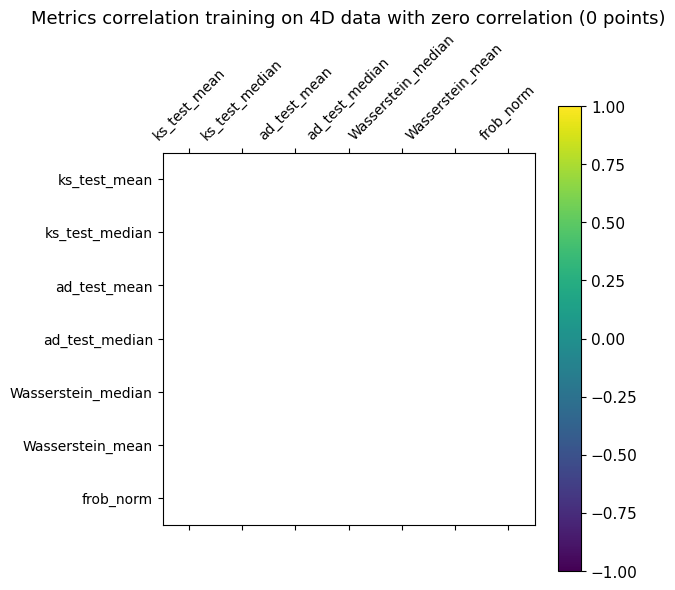

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


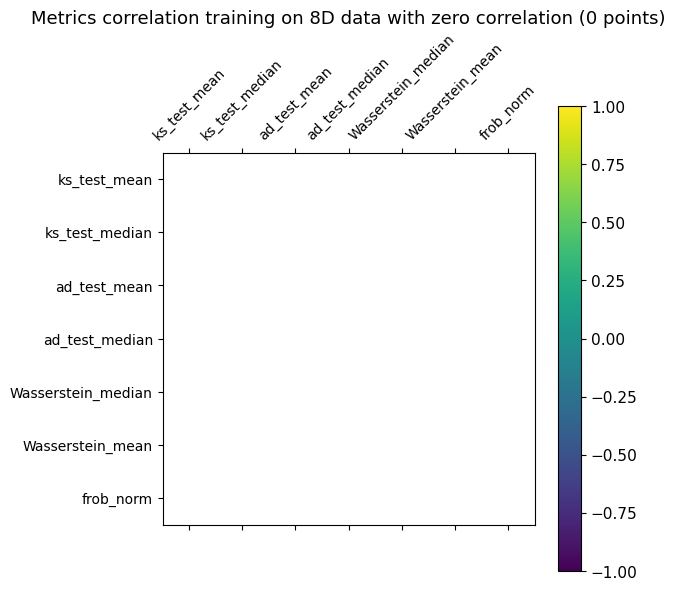

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


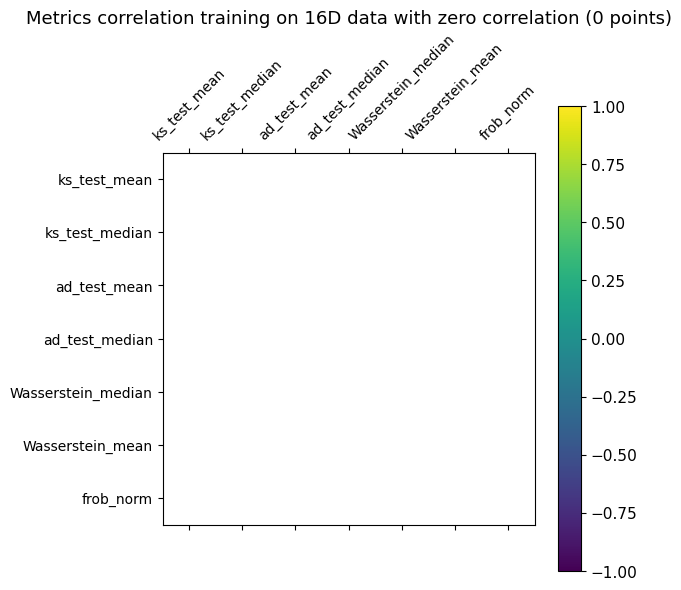

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


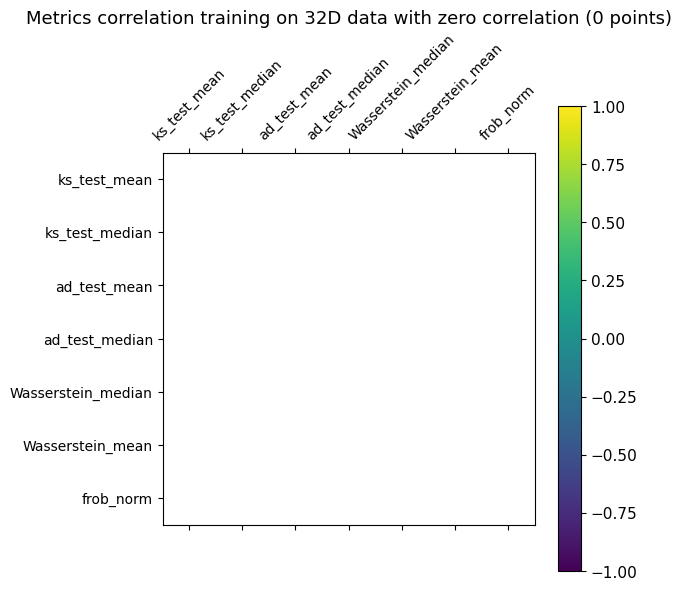

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


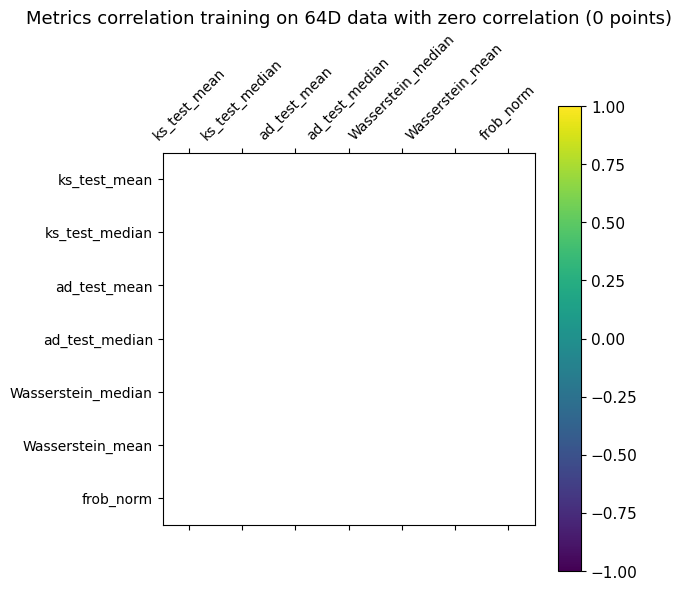

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


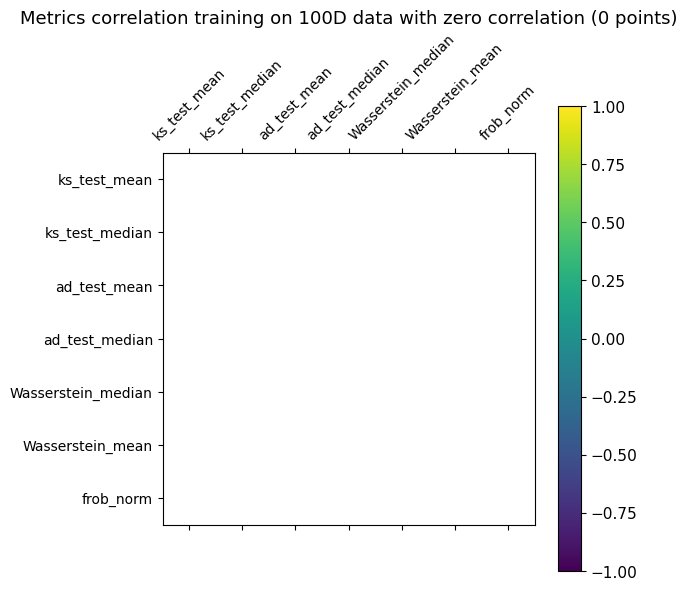

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


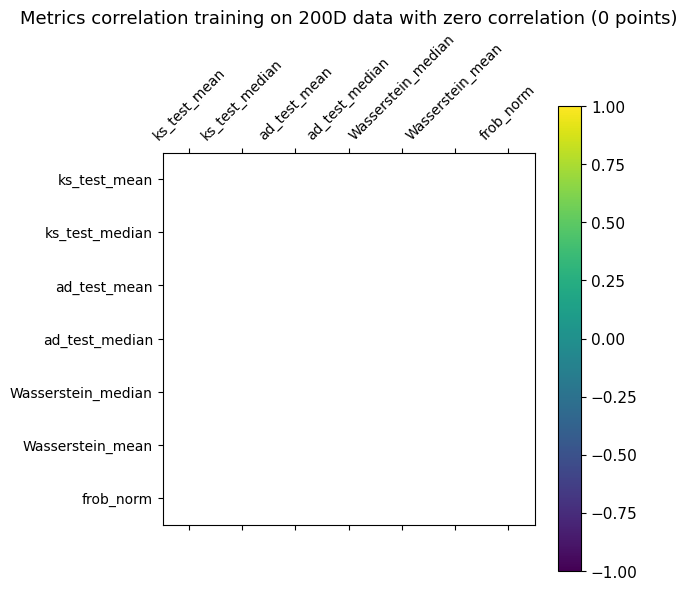

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


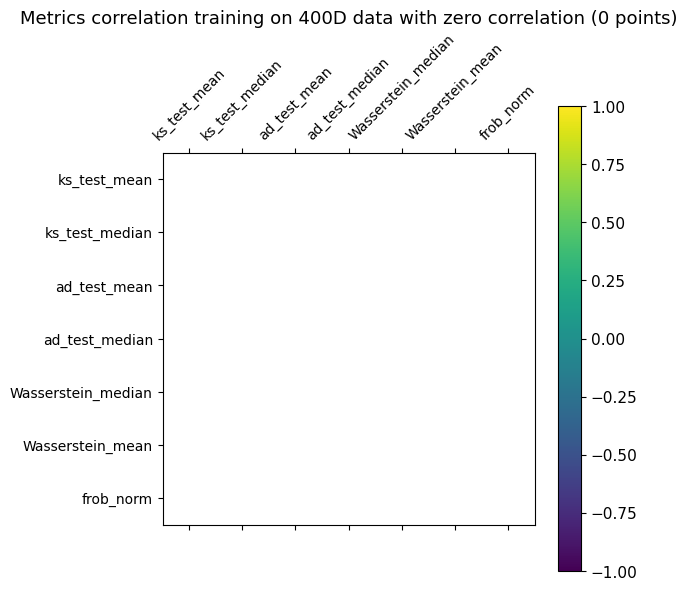

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


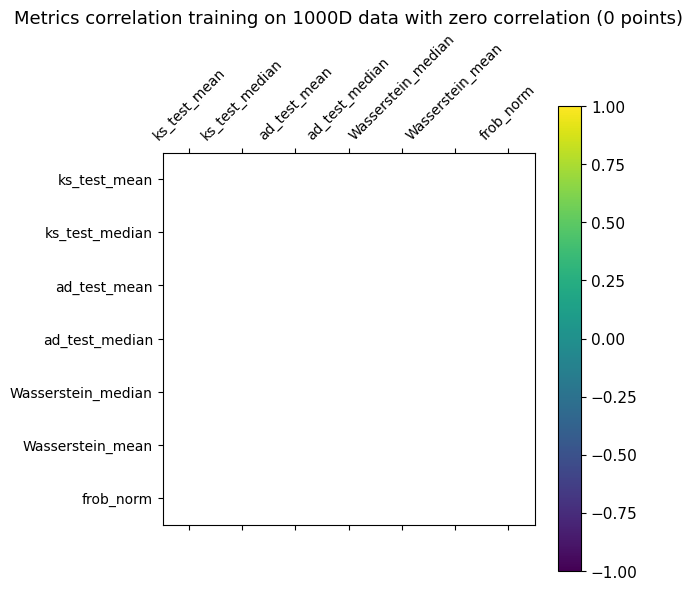

In [12]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with zero correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

## Results for different dimensions

### 4D

In [14]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced = df_reduced.drop(['range_min', 'regulariser','eps_regulariser','kl_divergence'], axis=1)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2668251244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [15]:
df_reduced_sorted[df_reduced_sorted['bijector']=="MsplineN"][df_reduced_sorted['correlation']=="corr"]

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3208656438.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced_sorted[df_reduced_sorted['bijector']=="MsplineN"][df_reduced_sorted['correlation']=="corr"]


run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
3      4         0      4    100000        corr           2  MsplineN   
5      1         0      4    100000        corr           2  MsplineN   
6      2         0      4    100000        corr           2  MsplineN   
9      3         0      4    100000        corr           2  MsplineN   

  activation  spline_knots  ks_test_mean  ...  ad_test_mean  ad_test_median  \
3       relu            12      0.465701  ...      0.215899        0.215800   
5       relu             8      0.474511  ...      0.214522        0.218469   
6       relu             8      0.481650  ...      0.220735        0.216889   
9       relu            12      0.491028  ...      0.214728        0.219215   

   Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers batch_size  \
3            0.019549          0.019549   0.035943    256-256-256        512   
5            0.021189          0.021189   0.029536    128-128-128        512   
6            0.022708          0.022708   0.042539    256-256-256        512   
9            0.024459          0.024459   0.012470    128-128-128        512   

   epochs_input  epochs_output         time  
3          1000            377  2099.885369  
5          1000            391  2197.884735  
6          1000            549  3066.342033  
9          1000            342  1921.544924  

[4 rows x 21 columns]

In [16]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4274562246.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4274562246.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4274562246.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4274562246.py:6: UserWarning: Boolean Ser

In [17]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3688481105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [18]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\829479110.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\829479110.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\829479110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\829479110.py:6: UserWarning: Boolean Series 

### 8D

In [19]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4142751268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [20]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2288846742.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2288846742.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2288846742.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2288846742.py:6: UserWarning: Boolean Ser

In [21]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2613932260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [22]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1862280933.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1862280933.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1862280933.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1862280933.py:6: UserWarning: Boolean Ser

### 16D

In [23]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\351116721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [24]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2188700536.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2188700536.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2188700536.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2188700536.py:6: UserWarning: Boolean Ser

In [25]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3747337042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [26]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4155429412.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4155429412.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4155429412.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4155429412.py:6: UserWarning: Boolean Ser

### 32D

In [27]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3958071327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [28]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2933466798.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2933466798.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2933466798.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2933466798.py:6: UserWarning: Boolean Ser

In [29]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\587041356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [30]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2044289941.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2044289941.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2044289941.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2044289941.py:6: UserWarning: Boolean Ser

### 64D

In [31]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2597498800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [32]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1626707497.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1626707497.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1626707497.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1626707497.py:6: UserWarning: Boolean Ser

In [33]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1417158665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [34]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3508089277.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3508089277.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3508089277.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3508089277.py:6: UserWarning: Boolean Ser

### 100D

In [35]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2762601144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [36]:
df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted['correlation']=="corr"]

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1592965810.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted['correlation']=="corr"]


run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
4     66         0    100    100000        corr           5  CsplineN   
5     72         0    100    100000        corr          10  CsplineN   
6     69         0    100    100000        corr          10  CsplineN   

  activation  spline_knots  range_min  ...  ad_test_mean ad_test_median  \
4       relu            12        -16  ...      0.035683       0.061234   
5       relu            12        -16  ...      0.010920       0.045822   
6       relu             8        -16  ...      0.004775       0.035045   

   Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers  batch_size  \
4            0.175004          0.175004   0.832717    512-512-512         512   
5            0.206724          0.206724   0.752075    512-512-512         512   
6            0.239678          0.239678   0.780631    512-512-512         512   

   epochs_input  epochs_output          time  
4          1000            182   5050.196487  
5          1000            185  10441.220015  
6          1000            152   7863.015184  

[3 rows x 25 columns]

In [37]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2143777587.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2143777587.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2143777587.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2143777587.py:6: UserWarning: Boolean Ser

In [38]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2009708343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [39]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1310235282.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1310235282.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1310235282.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1310235282.py:6: UserWarning: Boolean Ser

### 200D

In [40]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2210023598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [41]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1610614430.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1610614430.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1610614430.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1610614430.py:6: UserWarning: Boolean Ser

In [42]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\297281922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [43]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3743186108.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3743186108.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3743186108.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3743186108.py:6: UserWarning: Boolean Ser

### 400D

In [44]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3365854405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [45]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\317471139.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\317471139.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\317471139.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\317471139.py:6: UserWarning: Boolean Series 

In [46]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2199699982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [47]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1902667925.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1902667925.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1902667925.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1902667925.py:6: UserWarning: Boolean Ser

### 1000D

In [48]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\462291488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [49]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4118419370.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4118419370.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4118419370.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4118419370.py:6: UserWarning: Boolean Ser

In [50]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1805559046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [51]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2689821754.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2689821754.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2689821754.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2689821754.py:6: UserWarning: Boolean Ser

## Best models

In [52]:
df_bests_uncorr = [df_best_4D_uncorr_WD,df_best_8D_uncorr_WD,df_best_16D_uncorr_WD,df_best_32D_uncorr_WD,df_best_64D_uncorr_WD,df_best_100D_uncorr_WD,df_best_200D_uncorr_WD,df_best_400D_uncorr_WD,df_best_1000D_uncorr_WD]

In [53]:
tmp=pd.concat(df_bests_uncorr)
tmp2=tmp[tmp["bijector"]=="MAFN"]
tmp2[tmp2["correlation"]=="corr"]

run_n  run_seed  ndims  nsamples correlation  nbijectors bijector  \
12      3         0      4    100000        corr          10     MAFN   
15      7         0      8    100000        corr          10     MAFN   
6      11         0     16    100000        corr          10     MAFN   
13     16         0     32    100000        corr          10     MAFN   
7      19         0     64    100000        corr          10     MAFN   

   activation  spline_knots  ks_test_mean  ...  frob_norm  hidden_layers  \
12       relu             8      0.439230  ...   0.045468    128-128-128   
15       relu             8      0.241139  ...   0.080696    128-128-128   
6        relu             8      0.196245  ...   0.164279    128-128-128   
13       relu             8      0.057819  ...   0.374894    256-256-256   
7        relu             8      0.037125  ...   0.678376    128-128-128   

    batch_size  epochs_input  epochs_output         time range_min  \
12         512          1000            357  1606.117240       NaN   
15         512          1000            207   928.554179      -5.0   
6          512          1000            319  1475.101533      -5.0   
13         512          1000            207  1073.129753      -5.0   
7          512          1000            292  1556.730119      -5.0   

    eps_regulariser  regulariser  kl_divergence  
12              NaN          NaN            NaN  
15              0.0         None           -1.0  
6               0.0         None           -1.0  
13              0.0         None           -1.0  
7               0.0         None           -1.0  

[5 rows x 25 columns]

## Plots

### Wasserstein distance

In [54]:
MsplineN_corr_WD = extract_lines(df_bests_uncorr,"MsplineN","corr","Wasserstein_median")
MsplineN_uncorr_WD = extract_lines(df_bests_uncorr,"MsplineN","uncorr","Wasserstein_median")
CsplineN_corr_WD = extract_lines(df_bests_uncorr,"CsplineN","corr","Wasserstein_median")
CsplineN_uncorr_WD = extract_lines(df_bests_uncorr,"CsplineN","uncorr","Wasserstein_median")
MAFN_corr_WD = extract_lines(df_bests_uncorr,"MAFN","corr","Wasserstein_median")
MAFN_uncorr_WD = extract_lines(df_bests_uncorr,"MAFN","uncorr","Wasserstein_median")
RealNVPN_corr_WD = extract_lines(df_bests_uncorr,"RealNVPN","corr","Wasserstein_median")
RealNVPN_uncorr_WD = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","Wasserstein_median")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1722591272.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1722591272.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1722591272.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take prece

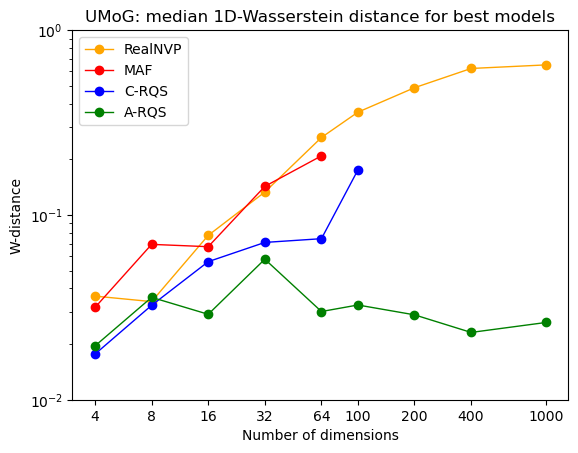

In [56]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('W-distance')
plt.ylim(0.01,1)
plt.title("UMoG: median 1D-Wasserstein distance for best models")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_WD_median_uncorr.pdf')
plt.show()
plt.close()

In [493]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="-", linewidth=linewidth)
#for i in MsplineN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_WD[:,0],MsplineN_uncorr_WD[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="-", linewidth=linewidth)
#for i in CsplineN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_WD[:,0],CsplineN_uncorr_WD[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF (corr)', linestyle="-", linewidth=linewidth)
#for i in MAFN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_WD[:,0],MAFN_uncorr_WD[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_WD[:,0],RealNVPN_uncorr_WD[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0,0.6)
#plt.title("Un-corr. MoG: median Wasserstein distance for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_WD_median_uncorr.pdf')
#plt.show()
#plt.close()

### KS

In [57]:
MsplineN_corr_KS = extract_lines(df_bests_uncorr,"MsplineN","corr","ks_test_median")
MsplineN_uncorr_KS = extract_lines(df_bests_uncorr,"MsplineN","uncorr","ks_test_median")
CsplineN_corr_KS = extract_lines(df_bests_uncorr,"CsplineN","corr","ks_test_median")
CsplineN_uncorr_KS = extract_lines(df_bests_uncorr,"CsplineN","uncorr","ks_test_median")
MAFN_corr_KS = extract_lines(df_bests_uncorr,"MAFN","corr","ks_test_median")
MAFN_uncorr_KS = extract_lines(df_bests_uncorr,"MAFN","uncorr","ks_test_median")
RealNVPN_corr_KS = extract_lines(df_bests_uncorr,"RealNVPN","corr","ks_test_median")
RealNVPN_uncorr_KS = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","ks_test_median")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

In [495]:
#KS_threshold=0.000000001
#MsplineN_corr_KS = np.array([x for x in MsplineN_corr_KS if x[1]>KS_threshold])
#MsplineN_uncorr_KS = np.array([x for x in MsplineN_uncorr_KS if x[1]>KS_threshold])
#CsplineN_corr_KS = np.array([x for x in CsplineN_corr_KS if x[1]>KS_threshold])
#CsplineN_uncorr_KS = np.array([x for x in CsplineN_uncorr_KS if x[1]>KS_threshold])
#MAFN_corr_KS = np.array([x for x in MAFN_corr_KS if x[1]>KS_threshold])
#MAFN_uncorr_KS = np.array([x for x in MAFN_uncorr_KS if x[1]>KS_threshold])
#RealNVPN_corr_KS = np.array([x for x in RealNVPN_corr_KS if x[1]>KS_threshold])
#RealNVPN_uncorr_KS = np.array([x for x in RealNVPN_uncorr_KS if x[1]>KS_threshold])

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2598616942.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2598616942.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2598616942.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take prece

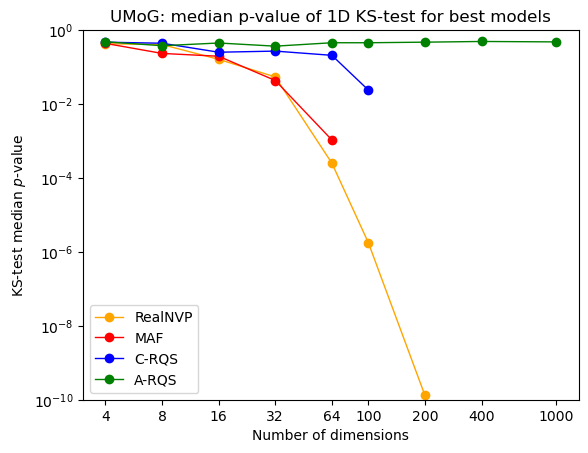

In [58]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_KS:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('KS-test median $p$-value')
plt.ylim(1e-10,1)
plt.title("UMoG: median p-value of 1D KS-test for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_KS_median_uncorr.pdf')
plt.show()
plt.close()

In [497]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in MsplineN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_KS[:,0],MsplineN_uncorr_KS[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in CsplineN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_KS[:,0],CsplineN_uncorr_KS[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.95, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF (corr)', linestyle="solid", linewidth=linewidth)
#for i in MAFN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_KS[:,0],MAFN_uncorr_KS[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle="solid", linewidth=linewidth)
#for i in RealNVPN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_KS[:,0],RealNVPN_uncorr_KS[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.01,1)
#plt.title("Un-corr. MoG: median p-value of KS-test for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_KS_median_uncorr.pdf')
#plt.show()
#plt.close()

### Frobenius-norm

In [59]:
MsplineN_corr_FN = extract_lines(df_bests_uncorr,"MsplineN","corr","frob_norm")
MsplineN_uncorr_FN = extract_lines(df_bests_uncorr,"MsplineN","uncorr","frob_norm")
CsplineN_corr_FN = extract_lines(df_bests_uncorr,"CsplineN","corr","frob_norm")
CsplineN_uncorr_FN = extract_lines(df_bests_uncorr,"CsplineN","uncorr","frob_norm")
MAFN_corr_FN = extract_lines(df_bests_uncorr,"MAFN","corr","frob_norm")
MAFN_uncorr_FN = extract_lines(df_bests_uncorr,"MAFN","uncorr","frob_norm")
RealNVPN_corr_FN = extract_lines(df_bests_uncorr,"RealNVPN","corr","frob_norm")
RealNVPN_uncorr_FN = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","frob_norm")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3264471043.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3264471043.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3264471043.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take prece

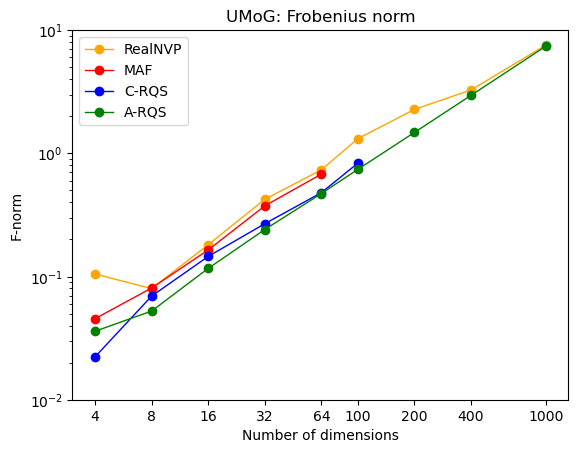

In [60]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_FN[:,0],MAFN_corr_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_FN[:,0],CsplineN_corr_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_FN[:,0],MsplineN_corr_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm')
plt.ylim(0.01,10)
plt.title("UMoG: Frobenius norm")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_FN_uncorr.pdf')
plt.show()
plt.close()

### Training time

In [61]:
MsplineN_corr_time = extract_lines(df_bests_uncorr,"MsplineN","corr","time").astype(np.float)
MsplineN_uncorr_time = extract_lines(df_bests_uncorr,"MsplineN","uncorr","time").astype(np.float)
CsplineN_corr_time = extract_lines(df_bests_uncorr,"CsplineN","corr","time").astype(np.float)
CsplineN_uncorr_time = extract_lines(df_bests_uncorr,"CsplineN","uncorr","time").astype(np.float)
MAFN_corr_time = extract_lines(df_bests_uncorr,"MAFN","corr","time").astype(np.float)
MAFN_uncorr_time = extract_lines(df_bests_uncorr,"MAFN","uncorr","time").astype(np.float)
RealNVPN_corr_time = extract_lines(df_bests_uncorr,"RealNVPN","corr","time").astype(np.float)
RealNVPN_uncorr_time = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","time").astype(np.float)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2258755380.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MsplineN_corr_time = extract_lines(df_bests_uncorr,"MsplineN","corr","time").astype(np.float)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][d

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1266895183.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1266895183.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1266895183.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument

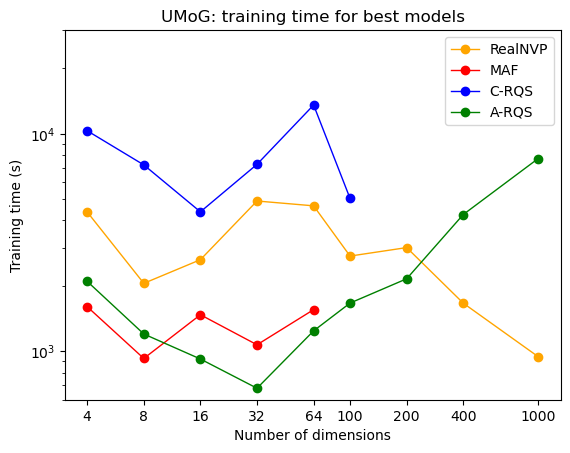

In [62]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
plt.plot(MAFN_corr_time[:,0],MAFN_corr_time[:,1],point_marker, color='red', label='MAF', linestyle="solid", linewidth=linewidth)
plt.plot(CsplineN_corr_time[:,0],CsplineN_corr_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="solid", linewidth=linewidth)
plt.plot(MsplineN_corr_time[:,0],MsplineN_corr_time[:,1],point_marker, color='green', label='A-RQS', linestyle="solid", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(600,30000)
plt.title("UMoG: training time for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_training_time_uncorr.pdf')
plt.show()
plt.close()

In [155]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_time[:,0],MsplineN_corr_time[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in MsplineN_corr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_time[:,0],MsplineN_uncorr_time[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_time[:,0],CsplineN_corr_time[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in CsplineN_corr_time:
#    plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_time[:,0],CsplineN_uncorr_time[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_time:
#    plt.text(i[0]*1.05,i[1]*0.95, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_time[:,0],MAFN_corr_time[:,1],point_marker, color='red', label='MAF (corr)', linestyle="solid", linewidth=linewidth)
#for i in MAFN_corr_time:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_time[:,0],MAFN_uncorr_time[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_time:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle="solid", linewidth=linewidth)
#for i in RealNVPN_corr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_time[:,0],RealNVPN_uncorr_time[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(300,30000)
#plt.title("Un-corr. MoG: training time (s) for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_training_time_uncorr.pdf')
#plt.show()
#plt.close()

## Tables

In [82]:
df_bests_uncorr[0]

run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
0       4         0      4    100000        corr           5  CsplineN   
3       4         0      4    100000        corr           2  MsplineN   
12      3         0      4    100000        corr          10      MAFN   
14      4         0      4    100000        corr          10  RealNVPN   

   activation  spline_knots  ks_test_mean  ...  ad_test_mean  ad_test_median  \
0        relu            12      0.472991  ...      0.211847        0.216385   
3        relu            12      0.465701  ...      0.215899        0.215800   
12       relu             8      0.439230  ...      0.217516        0.215212   
14       relu             8      0.402367  ...      0.212732        0.213810   

    Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers batch_size  \
0             0.017652          0.017652   0.022267    128-128-128        512   
3             0.019549          0.019549   0.035943    256-256-256        512   
12            0.031573          0.031573   0.045468    128-128-128        512   
14            0.036360          0.036360   0.104790    256-256-256        256   

    epochs_input  epochs_output          time  
0           1000            399  10340.128813  
3           1000            377   2099.885369  
12          1000            357   1606.117240  
14          1000            439   4376.519111  

[4 rows x 21 columns]

In [91]:
tmp=df_bests_uncorr[8]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

1000
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &  bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &  time \\
\midrule
0 &   256-256-256 &           2 &  MsplineN &             8 &         512 &           2.62e-02 &       4.80e-01 &  7.41e+00 &            448 &  7700 \\
4 &   128-128-128 &           5 &  RealNVPN &             8 &         256 &           6.48e-01 &       7.41e-16 &  7.57e+00 &            120 &   946 \\
\bottomrule
\end{tabular}



C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\102249961.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()


# Results for correlated mixture

## Check, fix, import results

### Check and fix results

In [63]:
correlated_results_paths = {"MAFN": "CMoG/results/MAFN/",
                           "RealNVPN": "CMoG/results/RealNVPN/",
                           "MsplineN": "CMoG/results/MsplineN/",
                           "CsplineN": "CMoG/results/CsplineN/"
                          }

In [64]:
for res in correlated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path CMoG/results/MAFN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG\results\MAFN\log_file_eternal_final.txt
Processing path CMoG/results/RealNVPN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG\results\RealNVPN\log_file_eternal_final.txt
Processing path CMoG/results/MsplineN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG\results\MsplineN\log_file_eternal_final.txt
Processing path CMoG/results/CsplineN/ for succeeded runs.
Succesfully imported 96 runs (failed to imp

### Import results

In [65]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in correlated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_correlated = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_correlated = df_correlated[~(df_correlated == 'failed').any(axis=1)]
len(df_correlated)

157

## Correlation of metrics

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


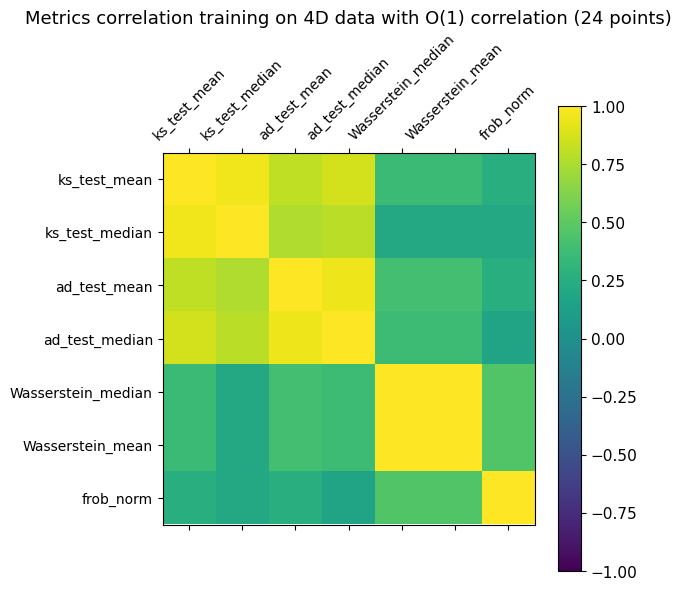

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


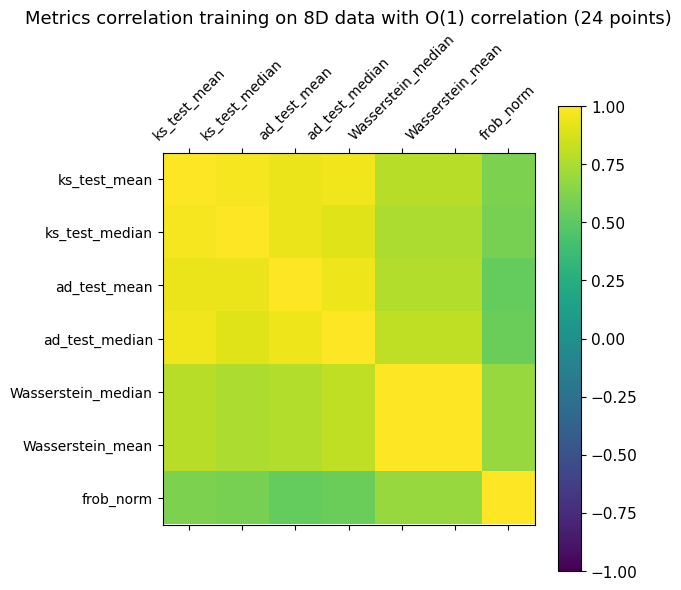

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


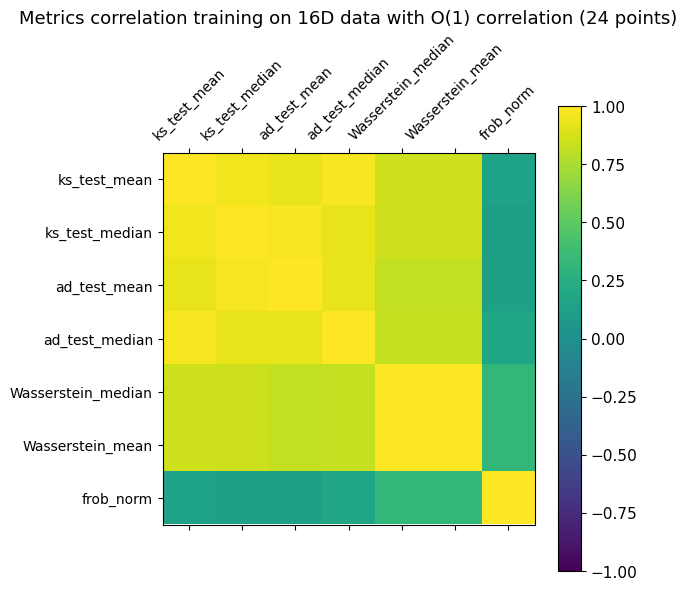

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


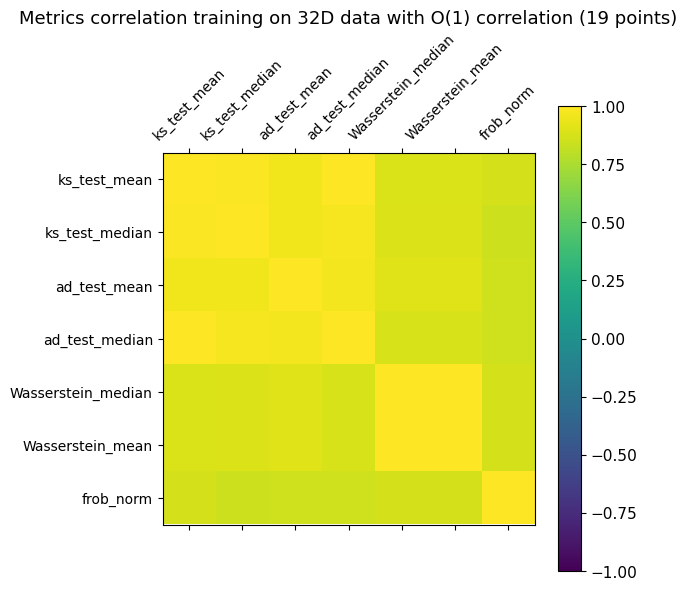

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


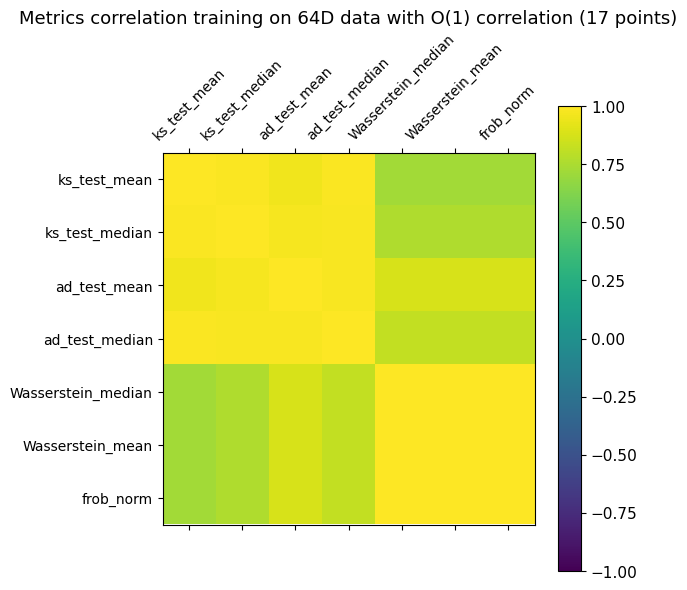

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


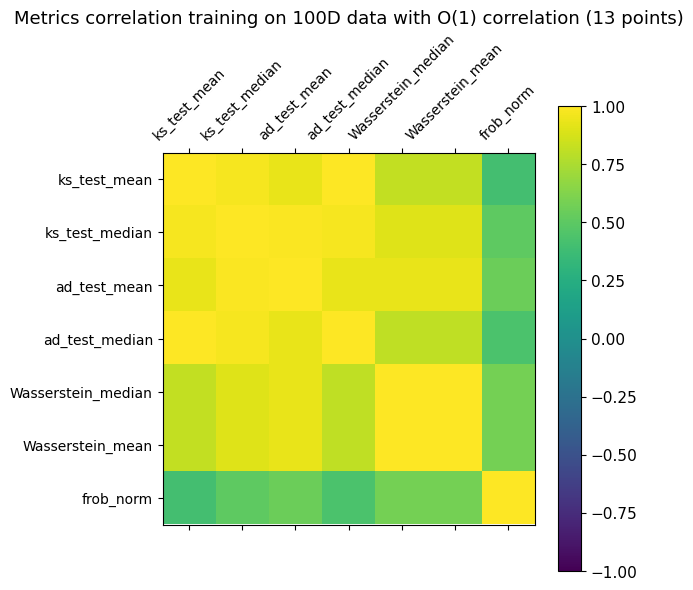

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


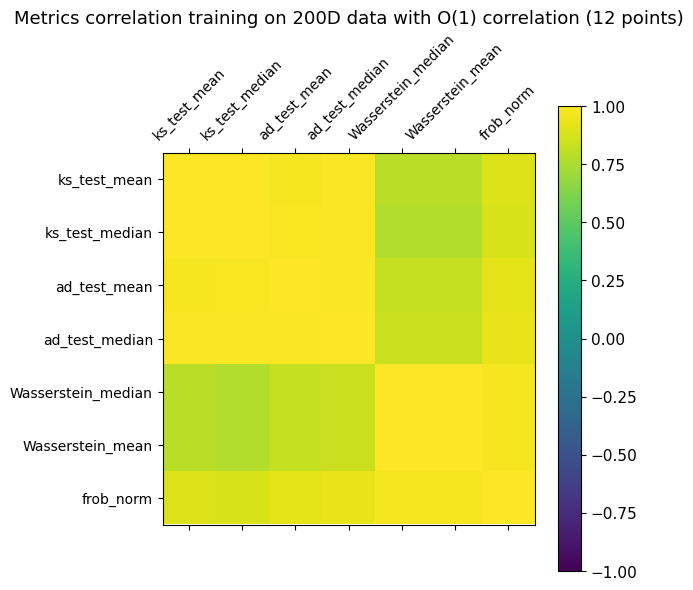

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


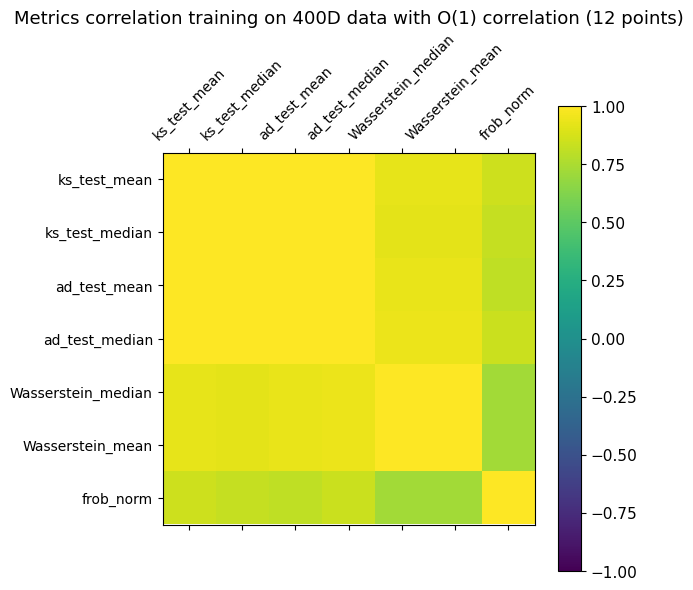

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\3652645851.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]


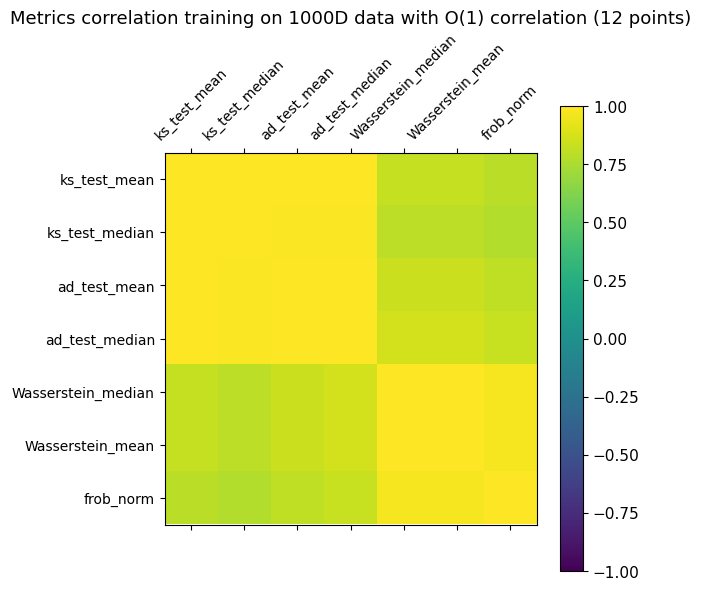

In [92]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with O(1) correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


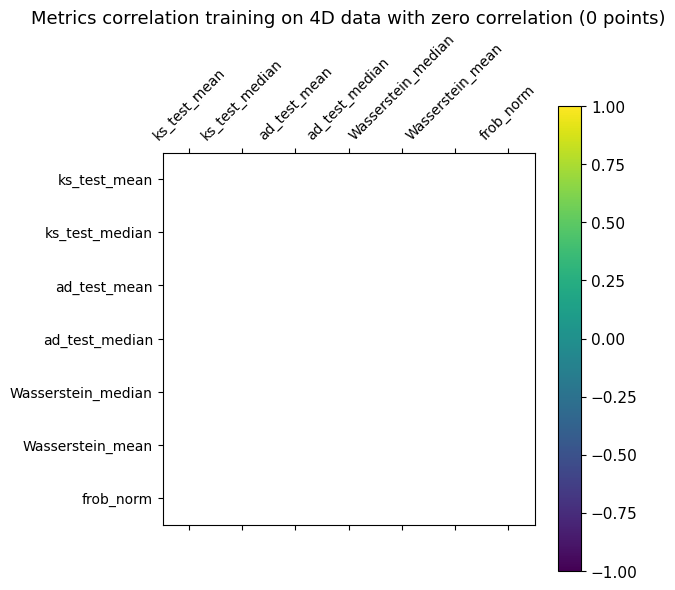

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


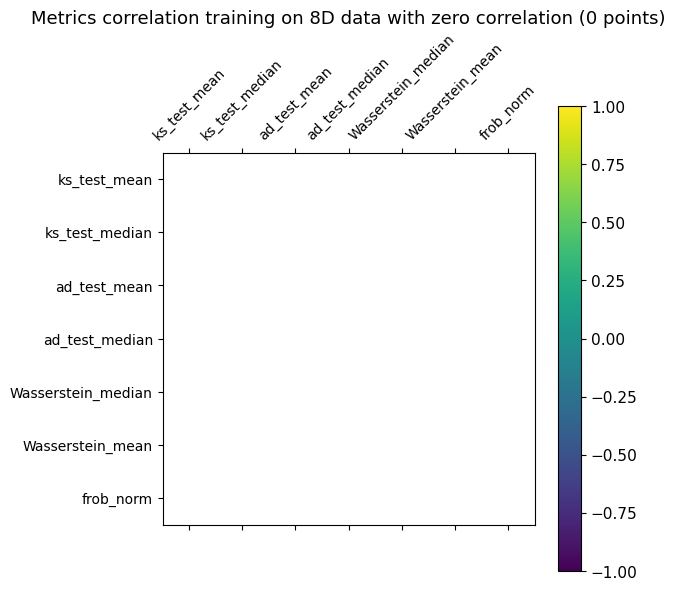

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


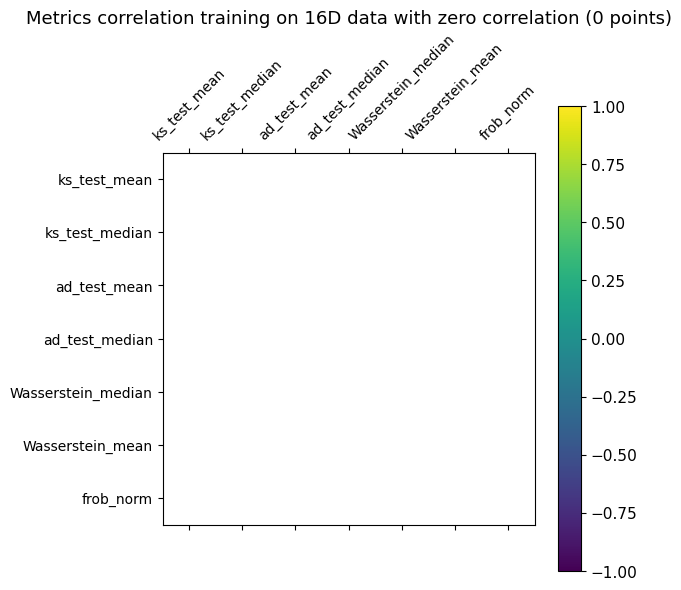

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


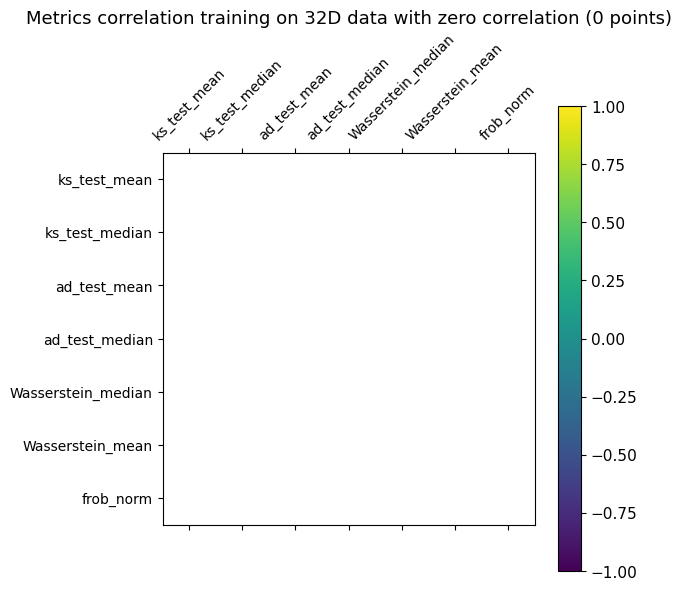

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


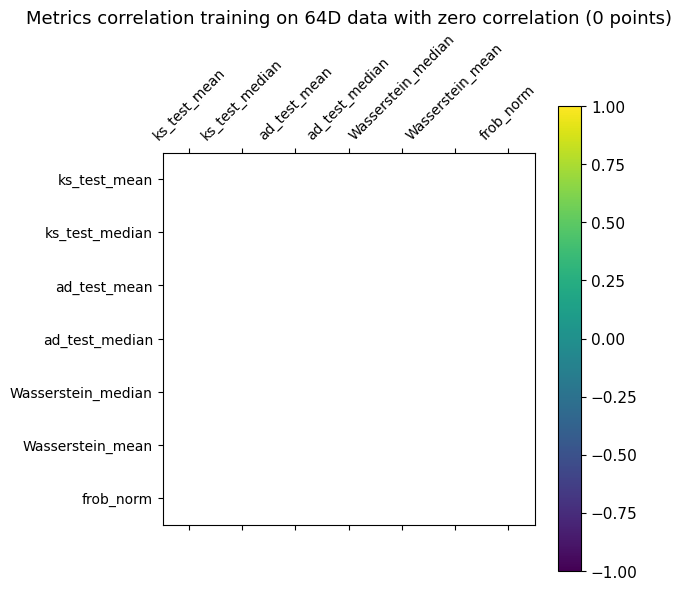

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


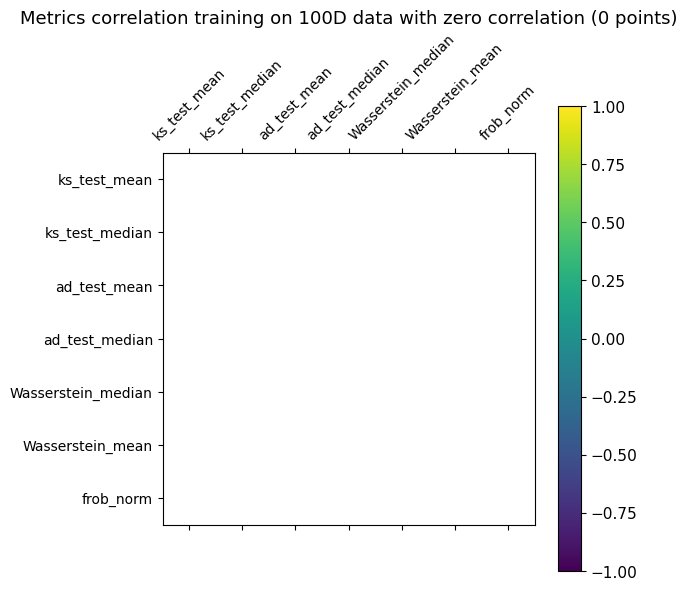

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


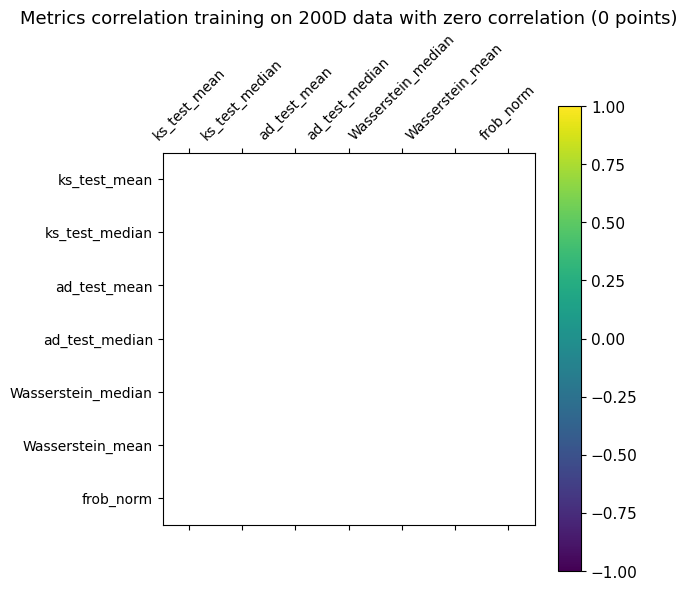

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


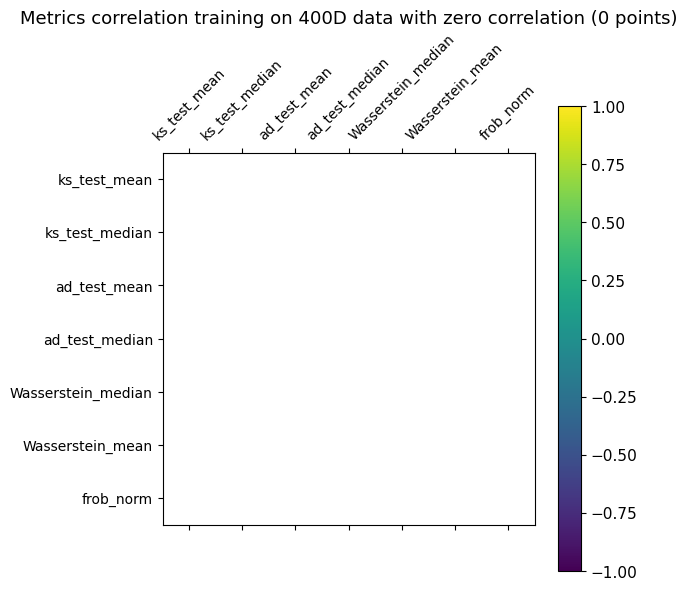

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\886712643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]


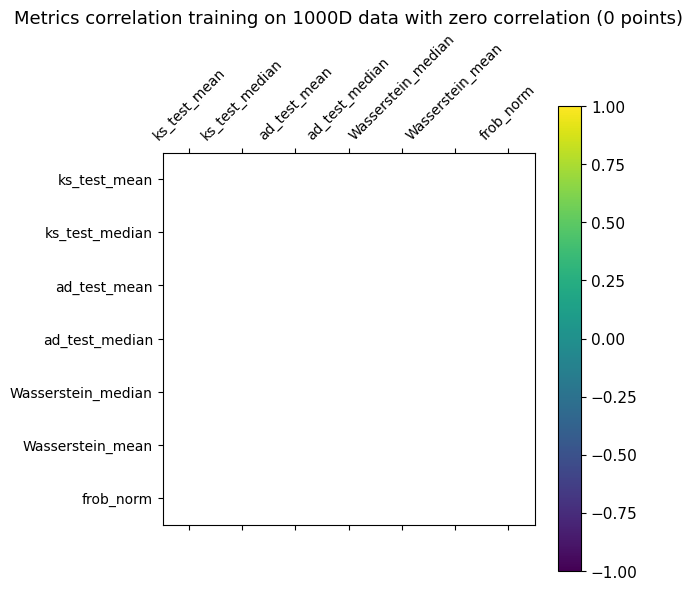

In [93]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with zero correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

## Results for different dimensions

### 4D

In [66]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\497828979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [67]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\901886626.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\901886626.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\901886626.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData

In [68]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3194874894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [69]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1455478587.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1455478587.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1455478587.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

### 8D

In [70]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2936874605.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [71]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2111051313.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2111051313.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2111051313.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [72]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\410171913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [73]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3598482875.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3598482875.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3598482875.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

### 16D

In [74]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4260783775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [75]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3237686405.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3237686405.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3237686405.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [76]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\194980504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [77]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1134708625.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1134708625.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1134708625.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

### 32D

In [78]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1012930203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [79]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1930400750.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1930400750.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1930400750.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [80]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3939534770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [81]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\642304831.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\642304831.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\642304831.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData

### 64D

In [82]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3211105525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [83]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3831538984.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3831538984.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3831538984.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [84]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3737679986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [85]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\654901691.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\654901691.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\654901691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData

### 100D

In [86]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2450780967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [87]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4220722614.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4220722614.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4220722614.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [88]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3067874332.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [89]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3735752238.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3735752238.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3735752238.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

### 200D

In [90]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\72889684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [91]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3199272945.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3199272945.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3199272945.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [92]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4130671388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [93]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\907897000.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\907897000.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\907897000.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData

### 400D

In [94]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2191618026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [95]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2025762148.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2025762148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2025762148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [96]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3711414471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [97]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3518026683.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3518026683.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3518026683.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

### 1000D

In [98]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4102508930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [99]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4224589275.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4224589275.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4224589275.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

In [100]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1221294946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [101]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3581097072.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3581097072.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3581097072.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppD

## Best models

In [102]:
df_bests_corr = [df_best_4D_corr_WD,df_best_8D_corr_WD,df_best_16D_corr_WD,df_best_32D_corr_WD,df_best_64D_corr_WD,df_best_100D_corr_WD,df_best_200D_corr_WD,df_best_400D_corr_WD,df_best_1000D_corr_WD]

In [103]:
tmp=pd.concat(df_bests_corr)
tmp2=tmp[tmp["bijector"]=="MAFN"]
tmp2[tmp2["correlation"]=="corr"]

run_n  run_seed  ndims  nsamples correlation  nbijectors bijector  \
13      1         0      4    100000        corr           5     MAFN   
1       5         0      8    100000        corr           5     MAFN   
2      11         0     16    100000        corr          10     MAFN   
0      14         0     32    100000        corr           5     MAFN   
3      17         0     64    100000        corr           5     MAFN   
5      24         0    100    100000        corr          10     MAFN   
6      25         0    200    100000        corr           5     MAFN   
3      29         0    400    100000        corr           5     MAFN   
6      33         0   1000    100000        corr           5     MAFN   

   activation  spline_knots  range_min  ...  ad_test_mean ad_test_median  \
13       relu             8         -5  ...      0.207930       0.208451   
1        relu             8         -5  ...      0.221334       0.217762   
2        relu             8         -5  ...      0.200868       0.183711   
0        relu             8         -5  ...      0.220103       0.214847   
3        relu             8         -5  ...      0.218431       0.214161   
5        relu             8         -5  ...      0.183417       0.162556   
6        relu             8         -5  ...      0.204746       0.194071   
3        relu             8         -5  ...      0.209075       0.200096   
6        relu             8         -5  ...      0.001006       0.008276   

    Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers  \
13            0.022466          0.022466   0.030542    128-128-128   
1             0.019246          0.019246   0.046889    128-128-128   
2             0.023357          0.023357   0.249115    128-128-128   
0             0.017368          0.017368   0.116359    256-256-256   
3             0.030730          0.030730   0.241161    128-128-128   
5             0.057044          0.057044   0.796214    256-256-256   
6             0.067429          0.067429   3.117985    128-128-128   
3             0.051558          0.051558  13.015770    128-128-128   
6             0.395896          0.395896  56.709640    128-128-128   

    batch_size  epochs_input  epochs_output         time  
13         512          1000            323   745.240984  
1          512          1000            327   752.582348  
2          512          1000            153  1203.660969  
0          512          1000            176   493.744012  
3          512          1000            317   903.725706  
5          512          1000            141   692.764670  
6          512          1000            484  1258.813852  
3          512          1000            365  1447.374315  
6          512          1000            133   502.933207  

[9 rows x 25 columns]

## Plots

### Wasserstein distance

In [104]:
MsplineN_corr_WD = extract_lines(df_bests_corr,"MsplineN","corr","Wasserstein_median")
MsplineN_uncorr_WD = extract_lines(df_bests_corr,"MsplineN","uncorr","Wasserstein_median")
CsplineN_corr_WD = extract_lines(df_bests_corr,"CsplineN","corr","Wasserstein_median")
CsplineN_uncorr_WD = extract_lines(df_bests_corr,"CsplineN","uncorr","Wasserstein_median")
MAFN_corr_WD = extract_lines(df_bests_corr,"MAFN","corr","Wasserstein_median")
MAFN_uncorr_WD = extract_lines(df_bests_corr,"MAFN","uncorr","Wasserstein_median")
RealNVPN_corr_WD = extract_lines(df_bests_corr,"RealNVPN","corr","Wasserstein_median")
RealNVPN_uncorr_WD = extract_lines(df_bests_corr,"RealNVPN","uncorr","Wasserstein_median")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2024510105.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2024510105.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2024510105.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take prece

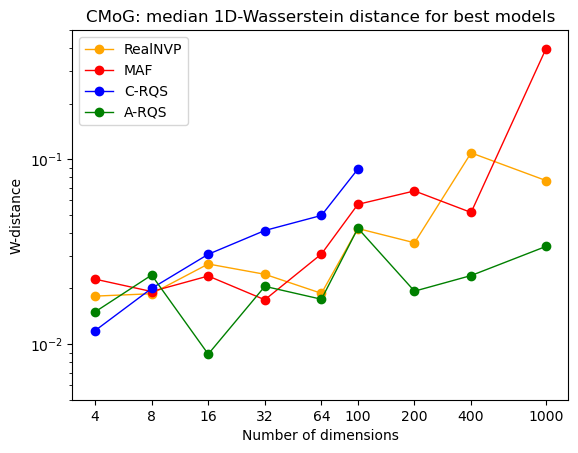

In [105]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('W-distance')
plt.ylim(0.005,0.5)
plt.title("CMoG: median 1D-Wasserstein distance for best models")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_WD_median_corr.pdf')
plt.show()
plt.close()

In [157]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="-", linewidth=linewidth)
#for i in MsplineN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_WD[:,0],MsplineN_uncorr_WD[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="-", linewidth=linewidth)
#for i in CsplineN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_WD[:,0],CsplineN_uncorr_WD[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF (corr)', linestyle="-", linewidth=linewidth)
#for i in MAFN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_WD[:,0],MAFN_uncorr_WD[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_WD[:,0],RealNVPN_uncorr_WD[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('Number of dimensions')
#plt.ylabel('W-distance')
#plt.ylim(0,5)
#plt.title("Corr. MoG: median Wasserstein distance for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_WD_median_corr.pdf')
#plt.show()
#plt.close()

### KS

In [106]:
MsplineN_corr_KS = extract_lines(df_bests_corr,"MsplineN","corr","ks_test_median")
MsplineN_uncorr_KS = extract_lines(df_bests_corr,"MsplineN","uncorr","ks_test_median")
CsplineN_corr_KS = extract_lines(df_bests_corr,"CsplineN","corr","ks_test_median")
CsplineN_uncorr_KS = extract_lines(df_bests_corr,"CsplineN","uncorr","ks_test_median")
MAFN_corr_KS = extract_lines(df_bests_corr,"MAFN","corr","ks_test_median")
MAFN_uncorr_KS = extract_lines(df_bests_corr,"MAFN","uncorr","ks_test_median")
RealNVPN_corr_KS = extract_lines(df_bests_corr,"RealNVPN","corr","ks_test_median")
RealNVPN_uncorr_KS = extract_lines(df_bests_corr,"RealNVPN","uncorr","ks_test_median")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

In [159]:
#KS_threshold=0.000000001
#MsplineN_corr_KS = np.array([x for x in MsplineN_corr_KS if x[1]>KS_threshold])
#MsplineN_uncorr_KS = np.array([x for x in MsplineN_uncorr_KS if x[1]>KS_threshold])
#CsplineN_corr_KS = np.array([x for x in CsplineN_corr_KS if x[1]>KS_threshold])
#CsplineN_uncorr_KS = np.array([x for x in CsplineN_uncorr_KS if x[1]>KS_threshold])
#MAFN_corr_KS = np.array([x for x in MAFN_corr_KS if x[1]>KS_threshold])
#MAFN_uncorr_KS = np.array([x for x in MAFN_uncorr_KS if x[1]>KS_threshold])
#RealNVPN_corr_KS = np.array([x for x in RealNVPN_corr_KS if x[1]>KS_threshold])
#RealNVPN_uncorr_KS = np.array([x for x in RealNVPN_uncorr_KS if x[1]>KS_threshold])

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1902617451.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1902617451.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1902617451.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take prece

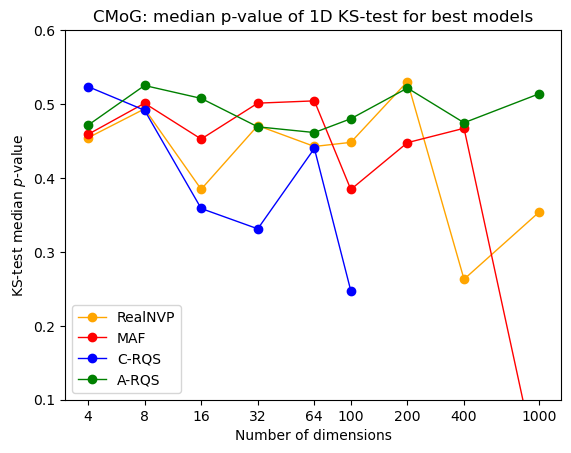

In [107]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_KS:
        plt.text(i[0]*1.05,i[1]*1.01, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('KS-test median $p$-value')
plt.ylim(0.1,0.6)
plt.title("CMoG: median p-value of 1D KS-test for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_KS_median_corr.pdf')
plt.show()
plt.close()

In [519]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in MsplineN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_KS[:,0],MsplineN_uncorr_KS[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in CsplineN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_KS[:,0],CsplineN_uncorr_KS[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.95, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF (corr)', linestyle="solid", linewidth=linewidth)
#for i in MAFN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_KS[:,0],MAFN_uncorr_KS[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle="solid", linewidth=linewidth)
#for i in RealNVPN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_KS[:,0],RealNVPN_uncorr_KS[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
##plt.yscale('log')
#plt.ylim(0.2,0.55)
#plt.title("Corr. MoG: median p-value of KS-test for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_KS_median_corr.pdf')
#plt.show()
#plt.close()

### Frobenius-norm

In [108]:
MsplineN_corr_FN = extract_lines(df_bests_corr,"MsplineN","corr","frob_norm")
MsplineN_uncorr_FN = extract_lines(df_bests_corr,"MsplineN","uncorr","frob_norm")
CsplineN_corr_FN = extract_lines(df_bests_corr,"CsplineN","corr","frob_norm")
CsplineN_uncorr_FN = extract_lines(df_bests_corr,"CsplineN","uncorr","frob_norm")
MAFN_corr_FN = extract_lines(df_bests_corr,"MAFN","corr","frob_norm")
MAFN_uncorr_FN = extract_lines(df_bests_corr,"MAFN","uncorr","frob_norm")
RealNVPN_corr_FN = extract_lines(df_bests_corr,"RealNVPN","corr","frob_norm")
RealNVPN_uncorr_FN = extract_lines(df_bests_corr,"RealNVPN","uncorr","frob_norm")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2287162799.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2287162799.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2287162799.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take prece

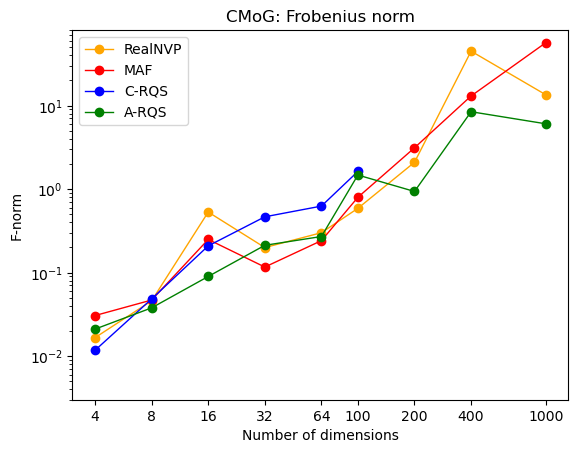

In [109]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_FN[:,0],MAFN_corr_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_FN[:,0],CsplineN_corr_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_FN[:,0],MsplineN_corr_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm')
plt.ylim(0.003,80)
plt.title("CMoG: Frobenius norm")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_FN_corr.pdf')
plt.show()
plt.close()

### Training time

In [110]:
MsplineN_corr_time = extract_lines(df_bests_corr,"MsplineN","corr","time").astype(np.float)
MsplineN_uncorr_time = extract_lines(df_bests_corr,"MsplineN","uncorr","time").astype(np.float)
CsplineN_corr_time = extract_lines(df_bests_corr,"CsplineN","corr","time").astype(np.float)
CsplineN_uncorr_time = extract_lines(df_bests_corr,"CsplineN","uncorr","time").astype(np.float)
MAFN_corr_time = extract_lines(df_bests_corr,"MAFN","corr","time").astype(np.float)
MAFN_uncorr_time = extract_lines(df_bests_corr,"MAFN","uncorr","time").astype(np.float)
RealNVPN_corr_time = extract_lines(df_bests_corr,"RealNVPN","corr","time").astype(np.float)
RealNVPN_uncorr_time = extract_lines(df_bests_corr,"RealNVPN","uncorr","time").astype(np.float)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1461121621.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MsplineN_corr_time = extract_lines(df_bests_corr,"MsplineN","corr","time").astype(np.float)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df[

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==b

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3781153223.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3781153223.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3781153223.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument

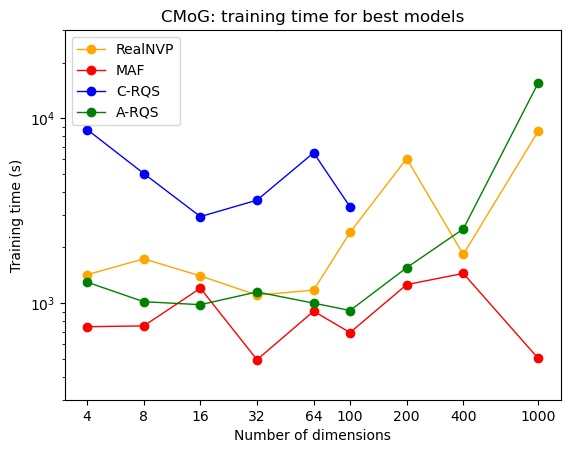

In [111]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
plt.plot(MAFN_corr_time[:,0],MAFN_corr_time[:,1],point_marker, color='red', label='MAF', linestyle="solid", linewidth=linewidth)
plt.plot(CsplineN_corr_time[:,0],CsplineN_corr_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="solid", linewidth=linewidth)
plt.plot(MsplineN_corr_time[:,0],MsplineN_corr_time[:,1],point_marker, color='green', label='A-RQS', linestyle="solid", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(300,30000)
plt.title("CMoG: training time for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_training_time_corr.pdf')
plt.show()
plt.close()

## Tables

In [181]:
tmp=df_bests_corr[8]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

1000
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &  bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &   time \\
\midrule
0 &   128-128-128 &           2 &  MsplineN &             8 &         512 &           3.38e-02 &       5.14e-01 &  6.04e+00 &           1000 &  15493 \\
3 &   128-128-128 &          10 &  RealNVPN &             8 &         256 &           7.67e-02 &       3.54e-01 &  1.34e+01 &            592 &   8504 \\
6 &   128-128-128 &           5 &      MAFN &             8 &         512 &           3.96e-01 &       3.02e-05 &  5.67e+01 &            133 &    502 \\
\bottomrule
\end{tabular}



C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\937436917.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()


# Results for extremely multimodal correlated mixture

## Check, fix, import results

### Check and fix results

In [112]:
hm_correlated_results_paths = {"MAFN": "CMoG_em/results/MAFN/",
                               "RealNVPN": "CMoG_em/results/RealNVPN/",
                               "MsplineN": "CMoG_em/results/MsplineN/",
                               "CsplineN": "CMoG_em/results/CsplineN/"
                              }

In [113]:
for res in hm_correlated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path CMoG_em/results/MAFN/ for succeeded runs.
Succesfully imported 8 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG_em\results\MAFN\log_file_eternal_final.txt
Processing path CMoG_em/results/RealNVPN/ for succeeded runs.
Succesfully imported 8 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG_em\results\RealNVPN\log_file_eternal_final.txt
Processing path CMoG_em/results/MsplineN/ for succeeded runs.
Succesfully imported 39 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG_em\results\MsplineN\log_file_eternal_final.txt
Processing path CMoG_em/results/CsplineN/ for succeeded runs.
Succesfully imported 7 r

### Import results

In [114]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in hm_correlated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_correlated_em = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_correlated_em = df_correlated_em[~(df_correlated_em == 'failed').any(axis=1)]
len(df_correlated_em)

61

In [115]:
tmp1 = df_correlated_em[df_correlated_em["spline_knots"]>13]
tmp2 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]>3]
tmp3 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]<3]
tmp4 = df_correlated_em[df_correlated_em["bijector"]!="MsplineN"]
tmp1["bijector"] = "MsplineN2"
tmp2["bijector"] = "MsplineN3"
df_correlated_em = pd.concat([tmp4,tmp3,tmp1,tmp2],ignore_index=True).reset_index(drop=True)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1161126519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp2 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]>3]
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1161126519.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp3 = df_correlated_em[df_correlated_em["spline_knots"]<13][df_correlated_em["bijector"]=="MsplineN"][df_correlated_em["nbijectors"]<3]
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1161126519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp1["bijector"] = "MsplineN2"
C:\Users\Riccardo Tor

In [116]:
df_correlated_em

run_n  run_seed  ndims  nsamples correlation  nbijectors   bijector  \
0       1         0      4    100000        corr           5       MAFN   
1       2         0      8    100000        corr           5       MAFN   
2       3         0     16    100000        corr          10       MAFN   
3       4         0     32    100000        corr           5       MAFN   
4       5         0     64    100000        corr           5       MAFN   
5       6         0    100    100000        corr          10       MAFN   
6       7         0    200    100000        corr           5       MAFN   
7       8         0    400    100000        corr           5       MAFN   
8       1         0      4    100000        corr           5   RealNVPN   
9       2         0      8    100000        corr           5   RealNVPN   
10      3         0     16    100000        corr          10   RealNVPN   
11      4         0     32    100000        corr           5   RealNVPN   
12      5         0     64    100000        corr           5   RealNVPN   
13      6         0    100    100000        corr           5   RealNVPN   
14      7         0    200    100000        corr          10   RealNVPN   
15      8         0    400    100000        corr          10   RealNVPN   
16      1         0      4    100000        corr           5   CsplineN   
17      2         0      8    100000        corr           5   CsplineN   
18      3         0     16    100000        corr           5   CsplineN   
19      4         0     32    100000        corr           5   CsplineN   
20      5         0     64    100000        corr           5   CsplineN   
21      6         0    100    100000        corr           5   CsplineN   
22      1         0      4    100000        corr           2   MsplineN   
23      2         0      8    100000        corr           2   MsplineN   
24      3         0     16    100000        corr           2   MsplineN   
25      4         0     32    100000        corr           2   MsplineN   
26      5         0     64    100000        corr           2   MsplineN   
27      6         0    100    100000        corr           2   MsplineN   
28      7         0    200    100000        corr           2   MsplineN   
29      8         0    400    100000        corr           2   MsplineN   
30     10         0      4    100000        corr           2  MsplineN2   
31     11         0      4    100000        corr           2  MsplineN2   
32     12         0      8    100000        corr           2  MsplineN2   
33     13         0      8    100000        corr           2  MsplineN2   
34     14         0     16    100000        corr           2  MsplineN2   
35     15         0     16    100000        corr           2  MsplineN2   
36     16         0     32    100000        corr           2  MsplineN2   
37     17         0     32    100000        corr           2  MsplineN2   
38     18         0     64    100000        corr           2  MsplineN2   
39     19         0     64    100000        corr           2  MsplineN2   
40     20         0    100    100000        corr           2  MsplineN2   
41     21         0    100    100000        corr           2  MsplineN2   
42     22         0    200    100000        corr           2  MsplineN2   
43     23         0    200    100000        corr           2  MsplineN2   
44     24         0    400    100000        corr           2  MsplineN2   
45     25         0      4    100000        corr           5  MsplineN3   
46     26         0      8    100000        corr           5  MsplineN3   
47     27         0     16    100000        corr           5  MsplineN3   
48     28         0     32    100000        corr           5  MsplineN3   
49     29         0     64    100000        corr           5  MsplineN3   
50     30         0    100    100000        corr           5  MsplineN3   
51     31         0    200    100000        corr           5  MsplineN3   
52     32         0    400   

## Results for different dimensions

### 4D

In [117]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1042314240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [118]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3077192939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3077192939.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3077192939.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3

In [119]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\96499780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [120]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\297585564.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\297585564.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\297585564.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2975

### 8D

In [121]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\968631014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [122]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2411383935.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2411383935.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2411383935.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2

In [123]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1117056521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [124]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1770025465.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1770025465.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1770025465.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1

### 16D

In [125]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\440931653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [126]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1228452676.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1228452676.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1228452676.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1

In [127]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2514538099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [128]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1786860791.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1786860791.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1786860791.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1

### 32D

In [129]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\586887061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [130]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3153382575.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3153382575.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3153382575.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3

In [131]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1364262207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [132]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2975018925.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2975018925.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2975018925.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2

### 64D

In [133]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2130924201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [134]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2484465694.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2484465694.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2484465694.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2

In [135]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\295721066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [136]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3522270729.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3522270729.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3522270729.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3

### 100D

In [137]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3888321720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [138]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3158703236.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3158703236.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3158703236.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3

In [139]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2565553297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [140]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2604150211.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2604150211.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2604150211.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2

### 200D

In [141]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3751871177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [142]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_200D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2844171006.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2844171006.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2844171006.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2

In [143]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3360229692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [144]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_200D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2352572650.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2352572650.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2352572650.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2

### 400D

In [145]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1338689738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [146]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_400D_corr_em_WD=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_em_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\332182019.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\332182019.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\332182019.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3321

In [147]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated_em[df_correlated_em["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1030135457.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [148]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN2_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN2"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN3_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN3"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_400D_corr_em_KS=pd.concat([MAFN_corr_best,RealNVPN_corr_best,MsplineN_corr_best,MsplineN2_corr_best,MsplineN3_corr_best,CsplineN_corr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_em_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1460216196.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1460216196.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1460216196.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1

## Best models

In [149]:
df_bests_corr_em = [df_best_4D_corr_em_WD,df_best_8D_corr_em_WD,df_best_16D_corr_em_WD,df_best_32D_corr_em_WD,df_best_64D_corr_em_WD,df_best_100D_corr_em_WD,df_best_200D_corr_em_WD,df_best_400D_corr_em_WD]

In [150]:
tmp=pd.concat(df_bests_corr_em)
tmp2=tmp[tmp["bijector"]=="MsplineN3"]
tmp2[tmp2["correlation"]=="corr"]

run_n  run_seed  ndims  nsamples correlation  nbijectors   bijector  \
3     25         0      4    100000        corr           5  MsplineN3   
5     34         0      8    100000        corr          10  MsplineN3   
3     27         0     16    100000        corr           5  MsplineN3   
0     28         0     32    100000        corr           5  MsplineN3   
3     29         0     64    100000        corr           5  MsplineN3   
0     30         0    100    100000        corr           5  MsplineN3   
2     31         0    200    100000        corr           5  MsplineN3   
3     40         0    400    100000        corr          10  MsplineN3   

  activation  spline_knots  range_min  ...  ad_test_mean ad_test_median  \
3       relu            12        -16  ...      0.225178       0.223551   
5       relu            12        -16  ...      0.213292       0.211699   
3       relu            12        -16  ...      0.217600       0.216050   
0       relu            12        -16  ...      0.213112       0.212893   
3       relu            12        -16  ...      0.199107       0.198640   
0       relu            12        -16  ...      0.216443       0.214361   
2       relu            12        -16  ...      0.155149       0.149227   
3       relu            12        -16  ...      0.067348       0.074811   

   Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers  batch_size  \
3            0.038030          0.038030   0.030742    128-128-128         512   
5            0.062320          0.062320   0.095262    512-512-512         512   
3            0.047726          0.047726   0.113841    128-128-128         512   
0            0.039534          0.039534   0.256123    128-128-128         512   
3            0.073210          0.073210   0.787161    128-128-128         512   
0            0.043642          0.043642   1.017099    128-128-128         512   
2            0.141884          0.141884   6.714460    128-128-128         512   
3            0.219614          0.219614  16.203641    512-512-512         512   

   epochs_input  epochs_output         time  
3          1000            310  4642.202877  
5          1000            106  3405.864037  
3          1000            200  2944.782877  
0          1000            202  3076.124507  
3          1000            173  2659.351234  
0          1000            193  2981.474866  
2          1000            191  2990.937485  
3          1000             82  4740.841193  

[8 rows x 25 columns]

In [163]:
df_bests_corr_em = [df[df["bijector"]!="MsplineN3"] for df in df_bests_corr_em]

## Plots

### Wasserstein distance

In [151]:
MsplineN_corr_em_WD = extract_lines(df_bests_corr_em,"MsplineN","corr","Wasserstein_median")
MsplineN2_corr_em_WD = extract_lines(df_bests_corr_em,"MsplineN2","corr","Wasserstein_median")
MsplineN3_corr_em_WD = extract_lines(df_bests_corr_em,"MsplineN3","corr","Wasserstein_median")
CsplineN_corr_em_WD = extract_lines(df_bests_corr_em,"CsplineN","corr","Wasserstein_median")
MAFN_corr_em_WD = extract_lines(df_bests_corr_em,"MAFN","corr","Wasserstein_median")
RealNVPN_corr_em_WD = extract_lines(df_bests_corr_em,"RealNVPN","corr","Wasserstein_median")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3853818752.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_WD[:,0],RealNVPN_corr_em_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3853818752.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_WD[:,0],RealNVPN_corr_em_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\3853818752.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument wil

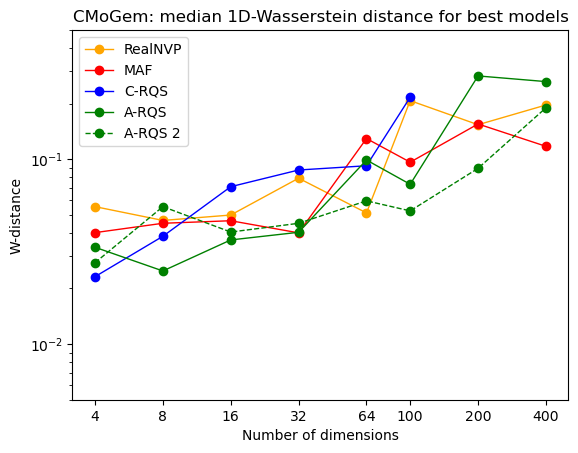

In [153]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_WD[:,0],RealNVPN_corr_em_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_WD[:,0],MAFN_corr_em_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_WD[:,0],CsplineN_corr_em_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_WD[:,0],MsplineN_corr_em_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_WD[:,0],MsplineN2_corr_em_WD[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_WD[:,0],MsplineN3_corr_em_WD[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
 #   for i in MsplineN3_corr_WD:
 #       plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('W-distance')
plt.ylim(0.005,0.5)
plt.title("CMoGem: median 1D-Wasserstein distance for best models")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_WD_median_corr_em.pdf')
plt.show()
plt.close()

### KS

In [154]:
MsplineN_corr_em_KS = extract_lines(df_bests_corr_em,"MsplineN","corr","ks_test_median")
MsplineN2_corr_em_KS = extract_lines(df_bests_corr_em,"MsplineN2","corr","ks_test_median")
MsplineN3_corr_em_KS = extract_lines(df_bests_corr_em,"MsplineN3","corr","ks_test_median")
CsplineN_corr_em_KS = extract_lines(df_bests_corr_em,"CsplineN","corr","ks_test_median")
MAFN_corr_em_KS = extract_lines(df_bests_corr_em,"MAFN","corr","ks_test_median")
RealNVPN_corr_em_KS = extract_lines(df_bests_corr_em,"RealNVPN","corr","ks_test_median")

In [209]:
#KS_threshold=0.000000001
#MsplineN_corr_KS = np.array([x for x in MsplineN_corr_KS if x[1]>KS_threshold])
#MsplineN_uncorr_KS = np.array([x for x in MsplineN_uncorr_KS if x[1]>KS_threshold])
#CsplineN_corr_KS = np.array([x for x in CsplineN_corr_KS if x[1]>KS_threshold])
#CsplineN_uncorr_KS = np.array([x for x in CsplineN_uncorr_KS if x[1]>KS_threshold])
#MAFN_corr_KS = np.array([x for x in MAFN_corr_KS if x[1]>KS_threshold])
#MAFN_uncorr_KS = np.array([x for x in MAFN_uncorr_KS if x[1]>KS_threshold])
#RealNVPN_corr_KS = np.array([x for x in RealNVPN_corr_KS if x[1]>KS_threshold])
#RealNVPN_uncorr_KS = np.array([x for x in RealNVPN_uncorr_KS if x[1]>KS_threshold])

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4155784645.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_KS[:,0],RealNVPN_corr_em_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4155784645.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_KS[:,0],RealNVPN_corr_em_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4155784645.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument wil

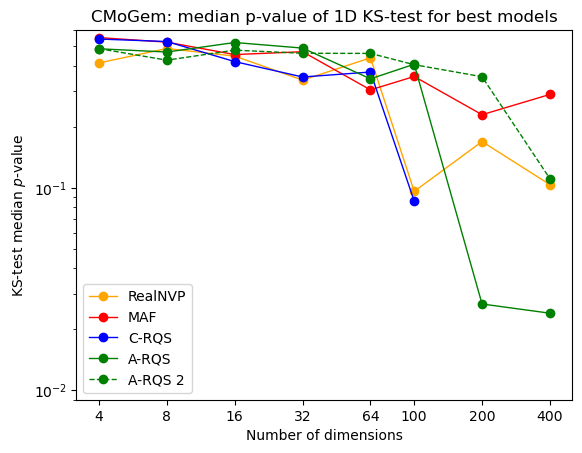

In [155]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_KS[:,0],RealNVPN_corr_em_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_KS[:,0],MAFN_corr_em_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_KS[:,0],CsplineN_corr_em_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_KS[:,0],MsplineN_corr_em_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_KS[:,0],MsplineN2_corr_em_KS[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_KS[:,0],MsplineN3_corr_em_KS[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
 #   for i in MsplineN3_corr_KS:
 #       plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_KS:
        plt.text(i[0]*1.05,i[1]*1.01, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('KS-test median $p$-value')
plt.ylim(0.009,0.6)
plt.title("CMoGem: median p-value of 1D KS-test for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_KS_median_corr_em.pdf')
plt.show()
plt.close()

### Frobenius-norm

In [156]:
MsplineN_corr_em_FN = extract_lines(df_bests_corr_em,"MsplineN","corr","frob_norm")
MsplineN2_corr_em_FN = extract_lines(df_bests_corr_em,"MsplineN2","corr","frob_norm")
MsplineN3_corr_em_FN = extract_lines(df_bests_corr_em,"MsplineN3","corr","frob_norm")
CsplineN_corr_em_FN = extract_lines(df_bests_corr_em,"CsplineN","corr","frob_norm")
MAFN_corr_em_FN = extract_lines(df_bests_corr_em,"MAFN","corr","frob_norm")
RealNVPN_corr_em_FN = extract_lines(df_bests_corr_em,"RealNVPN","corr","frob_norm")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1838610655.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_FN[:,0],RealNVPN_corr_em_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1838610655.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_FN[:,0],RealNVPN_corr_em_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1838610655.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument wil

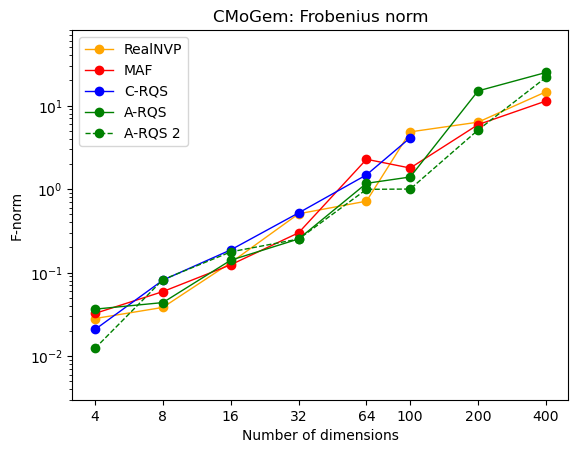

In [157]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_FN[:,0],RealNVPN_corr_em_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_FN[:,0],MAFN_corr_em_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_FN[:,0],CsplineN_corr_em_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_FN[:,0],MsplineN_corr_em_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_FN[:,0],MsplineN2_corr_em_FN[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_FN[:,0],MsplineN3_corr_em_FN[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
  #  for i in MsplineN3_corr_FN:
  #      plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm')
plt.ylim(0.003,80)
plt.title("CMoGem: Frobenius norm")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_FN_corr_em.pdf')
plt.show()
plt.close()

### Training time

In [158]:
MsplineN_corr_em_time = extract_lines(df_bests_corr_em,"MsplineN","corr","time").astype(np.float)
MsplineN2_corr_em_time = extract_lines(df_bests_corr_em,"MsplineN2","corr","time").astype(np.float)
MsplineN3_corr_em_time = extract_lines(df_bests_corr_em,"MsplineN3","corr","time").astype(np.float)
CsplineN_corr_em_time = extract_lines(df_bests_corr_em,"CsplineN","corr","time").astype(np.float)
MAFN_corr_em_time = extract_lines(df_bests_corr_em,"MAFN","corr","time").astype(np.float)
RealNVPN_corr_em_time = extract_lines(df_bests_corr_em,"RealNVPN","corr","time").astype(np.float)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2361116851.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MsplineN_corr_em_time = extract_lines(df_bests_corr_em,"MsplineN","corr","time").astype(np.float)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\2361116851.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4281502594.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_time[:,0],RealNVPN_corr_em_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4281502594.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_em_time[:,0],RealNVPN_corr_em_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\4281502594.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argu

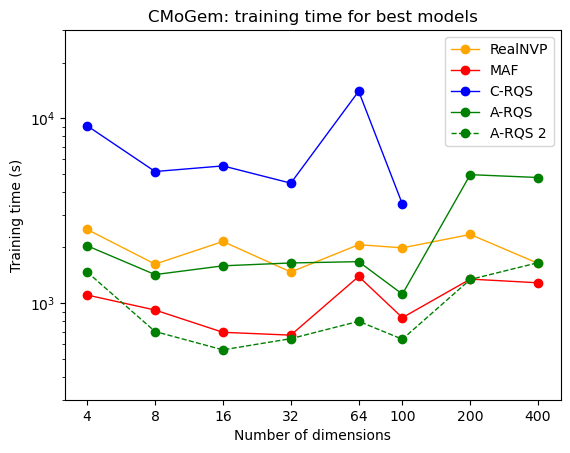

In [159]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_em_time[:,0],RealNVPN_corr_em_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_em_time[:,0],MAFN_corr_em_time[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_em_time[:,0],CsplineN_corr_em_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_em_time[:,0],MsplineN_corr_em_time[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN2_corr_em_time[:,0],MsplineN2_corr_em_time[:,1],point_marker, color='green', label='A-RQS 2', linestyle="--", linewidth=linewidth)
#plt.plot(MsplineN3_corr_em_time[:,0],MsplineN3_corr_em_time[:,1],point_marker, color='green', label='A-RQS 3', linestyle=":", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in MsplineN2_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
 #   for i in MsplineN3_corr_time:
 #       plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(300,30000)
plt.title("CMoGem: training time for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400], ['4','8','16','32','64','100','200','400'])
plt.savefig(paper_fig_dir + 'Best_training_time_corr_em.pdf')
plt.show()
plt.close()

## Tables

In [171]:
tmp=df_bests_corr_em[7]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

400
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &   bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &  time \\
\midrule
0 &   128-128-128 &           5 &       MAFN &             8 &         512 &           1.18e-01 &       2.89e-01 &  1.13e+01 &            460 &  1287 \\
1 &   512-512-512 &           2 &  MsplineN2 &            32 &         512 &           1.90e-01 &       1.11e-01 &  2.17e+01 &            116 &  1654 \\
2 &   256-256-256 &          10 &   RealNVPN &             8 &         256 &           1.97e-01 &       1.04e-01 &  1.46e+01 &            152 &  1640 \\
4 &   128-128-128 &           2 &   MsplineN &             8 &         512 &           2.63e-01 &       2.41e-02 &  2.49e+01 &            701 &  4781 \\
\bottomrule
\end{tabular}



C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_34008\1585590179.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()


# Results for truncated

## Check, fix, import results

### Check and fix results

In [62]:
hm_correlated_results_paths = {"MAFN": "Truncated/results/MAFN/",
                               "RealNVPN": "Truncated/results/RealNVPN/",
                               "MsplineN": "Truncated/results/MsplineN/",
                               "CsplineN": "Truncated/results/CsplineN/"
                              }

In [63]:
for res in hm_correlated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path Truncated/results/MAFN/ for succeeded runs.
Succesfully imported 24 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\Truncated\results\MAFN\log_file_eternal_final.txt
Processing path Truncated/results/RealNVPN/ for succeeded runs.
Succesfully imported 24 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\Truncated\results\RealNVPN\log_file_eternal_final.txt
Processing path Truncated/results/MsplineN/ for succeeded runs.
Succesfully imported 24 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\Riccardo Torre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\Truncated\results\MsplineN\log_file_eternal_final.txt
Processing path Truncated/results/CsplineN/ for succeeded runs.
No resul

### Import results

In [64]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in hm_correlated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_truncated = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_truncated = df_truncated[~(df_truncated == 'failed').any(axis=1)]
len(df_truncated)

92

In [65]:
df_truncated

run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
0       1         0      4    100000        corr           5      MAFN   
1       2         0      4    100000        corr           5      MAFN   
2       3         0      4    100000        corr          10      MAFN   
3       4         0      4    100000        corr          10      MAFN   
4       5         0      8    100000        corr           5      MAFN   
5       6         0      8    100000        corr           5      MAFN   
6       7         0      8    100000        corr          10      MAFN   
7       8         0      8    100000        corr          10      MAFN   
8       9         0     16    100000        corr           5      MAFN   
9      10         0     16    100000        corr           5      MAFN   
10     11         0     16    100000        corr          10      MAFN   
11     12         0     16    100000        corr          10      MAFN   
12     13         0     32    100000        corr           5      MAFN   
13     14         0     32    100000        corr           5      MAFN   
14     15         0     32    100000        corr          10      MAFN   
15     16         0     32    100000        corr          10      MAFN   
16     17         0     64    100000        corr           5      MAFN   
17     18         0     64    100000        corr           5      MAFN   
18     19         0     64    100000        corr          10      MAFN   
19     20         0     64    100000        corr          10      MAFN   
20     21         0    100    100000        corr           5      MAFN   
21     22         0    100    100000        corr           5      MAFN   
22     23         0    100    100000        corr          10      MAFN   
23     24         0    100    100000        corr          10      MAFN   
24      1         0      4    100000        corr           5  RealNVPN   
25      2         0      4    100000        corr           5  RealNVPN   
26      3         0      4    100000        corr          10  RealNVPN   
27      4         0      4    100000        corr          10  RealNVPN   
28      5         0      8    100000        corr           5  RealNVPN   
29      6         0      8    100000        corr           5  RealNVPN   
30      7         0      8    100000        corr          10  RealNVPN   
31      8         0      8    100000        corr          10  RealNVPN   
32      9         0     16    100000        corr           5  RealNVPN   
33     10         0     16    100000        corr           5  RealNVPN   
34     11         0     16    100000        corr          10  RealNVPN   
35     12         0     16    100000        corr          10  RealNVPN   
36     13         0     32    100000        corr           5  RealNVPN   
37     14         0     32    100000        corr           5  RealNVPN   
38     15         0     32    100000        corr          10  RealNVPN   
39     16         0     32    100000        corr          10  RealNVPN   
40     17         0     64    100000        corr           5  RealNVPN   
41     18         0     64    100000        corr           5  RealNVPN   
42     19         0     64    100000        corr          10  RealNVPN   
43     20         0     64    100000        corr          10  RealNVPN   
44     21         0    100    100000        corr           5  RealNVPN   
45     22         0    100    100000        corr           5  RealNVPN   
46     23         0    100    100000        corr          10  RealNVPN   
47     24         0    100    100000        corr          10  RealNVPN   
48      1         0      4    100000        corr           2  MsplineN   
49      2         0      4    100000        corr           2  MsplineN   
50      3         0      4    100000        corr           2  MsplineN   
51      4         0      4    100000        corr           2  MsplineN   
52      5         0      8    100000        corr           2  MsplineN   
53      

## Results for different dimensions

### 4D

In [66]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1213436705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [67]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1115422830.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1115422830.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1115422830.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

In [68]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\424194275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [69]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_4D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2550996223.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2550996223.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2550996223.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

### 8D

In [70]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2452160644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [71]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2711534640.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2711534640.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2711534640.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

In [72]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1231054557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [73]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_8D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\4123505892.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\4123505892.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\4123505892.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

### 16D

In [74]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3470983336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [75]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3674732535.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3674732535.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3674732535.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

In [76]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1126557268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [77]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_16D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3039092269.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3039092269.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3039092269.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

### 32D

In [78]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1273372029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [79]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\999706263.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\999706263.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\999706263.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykerne

In [80]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2266178271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [81]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_32D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\32338468.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\32338468.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\32338468.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7

### 64D

In [82]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2993665217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [83]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3474806264.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3474806264.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3474806264.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

In [84]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2639017273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [85]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_64D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\881185109.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\881185109.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\881185109.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykerne

### 100D

In [86]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2293442377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [87]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_truncated_WD=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_truncated_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\569564179.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\569564179.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\569564179.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykerne

In [88]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_truncated[df_truncated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2262918278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


In [89]:
sort_metric="ks_test_median"
ascending=False
MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
df_best_100D_truncated_KS=pd.concat([MAFN_truncated_best,RealNVPN_truncated_best,MsplineN_truncated_best,CsplineN_truncated_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_truncated_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1607048678.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1607048678.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\1607048678.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MsplineN_truncated_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\Riccardo Torre\AppData\Local\Temp\ipyke

## Best models

In [90]:
df_bests_truncated = [df_best_4D_truncated_WD,df_best_8D_truncated_WD,df_best_16D_truncated_WD,df_best_32D_truncated_WD,df_best_64D_truncated_WD,df_best_100D_truncated_WD]

In [91]:
df_bests_truncated

[    run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
 0       4         0      4    100000        corr           2  MsplineN   
 1       3         0      4    100000        corr          10  RealNVPN   
 4      10         0      4    100000        corr          10  CsplineN   
 18      2         0      4    100000        corr           5      MAFN   
 
    activation  spline_knots  range_min  ...  ad_test_mean ad_test_median  \
 0        relu            12        -16  ...      0.221889       0.221975   
 1        relu             8        -16  ...      0.218199       0.215192   
 4        relu            12        -16  ...      0.221982       0.219967   
 18       relu             8        -16  ...      0.218538       0.213860   
 
     Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers  \
 0             0.003111          0.003111   0.017446    256-256-256   
 1             0.004169          0.004169   0.045628    128-128-128   
 4             0.004946

In [92]:
tmp=pd.concat(df_bests_truncated)
tmp2=tmp[tmp["bijector"]=="MsplineN"]
tmp2[tmp2["correlation"]=="corr"]

run_n  run_seed  ndims  nsamples correlation  nbijectors  bijector  \
0      4         0      4    100000        corr           2  MsplineN   
1      7         0      8    100000        corr           2  MsplineN   
0     11         0     16    100000        corr           2  MsplineN   
0     15         0     32    100000        corr           2  MsplineN   
0     19         0     64    100000        corr           2  MsplineN   
0     21         0    100    100000        corr           2  MsplineN   

  activation  spline_knots  range_min  ...  ad_test_mean ad_test_median  \
0       relu            12        -16  ...      0.221889       0.221975   
1       relu            12        -16  ...      0.214550       0.202183   
0       relu            12        -16  ...      0.214629       0.200337   
0       relu            12        -16  ...      0.214032       0.203116   
0       relu            12        -16  ...      0.214028       0.204735   
0       relu             8        -16  ...      0.215530       0.209494   

   Wasserstein_median  Wasserstein_mean  frob_norm  hidden_layers  batch_size  \
0            0.003111          0.003111   0.017446    256-256-256         512   
1            0.004169          0.004169   0.056300    128-128-128         512   
0            0.004140          0.004140   0.121494    128-128-128         512   
0            0.003338          0.003338   0.239700    128-128-128         512   
0            0.004166          0.004166   0.472404    128-128-128         512   
0            0.003865          0.003865   0.739869    128-128-128         512   

   epochs_input  epochs_output         time  
0          1000            389  2148.551233  
1          1000            314  1756.678473  
0          1000            259  1426.044525  
0          1000            295  1553.346165  
0          1000            350  2607.073805  
0          1000            384  2104.272948  

[6 rows x 25 columns]

## Plots

### Wasserstein distance

In [93]:
MsplineN_truncated_WD = extract_lines(df_bests_truncated,"MsplineN","corr","Wasserstein_median")
CsplineN_truncated_WD = extract_lines(df_bests_truncated,"CsplineN","corr","Wasserstein_median")
MAFN_truncated_WD = extract_lines(df_bests_truncated,"MAFN","corr","Wasserstein_median")
RealNVPN_truncated_WD = extract_lines(df_bests_truncated,"RealNVPN","corr","Wasserstein_median")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\468908207.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_WD[:,0],RealNVPN_truncated_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\468908207.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_WD[:,0],RealNVPN_truncated_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\468908207.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument w

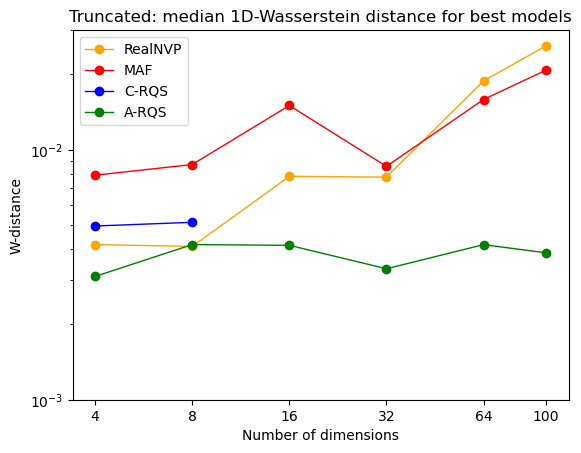

In [94]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_WD[:,0],RealNVPN_truncated_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_WD[:,0],MAFN_truncated_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_WD[:,0],CsplineN_truncated_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_WD[:,0],MsplineN_truncated_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('W-distance')
plt.ylim(0.001,0.03)
plt.title("Truncated: median 1D-Wasserstein distance for best models")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_WD_median_truncated.pdf')
plt.show()
plt.close()

### KS

In [95]:
MsplineN_truncated_KS = extract_lines(df_bests_truncated,"MsplineN","corr","ks_test_median")
CsplineN_truncated_KS = extract_lines(df_bests_truncated,"CsplineN","corr","ks_test_median")
MAFN_truncated_KS = extract_lines(df_bests_truncated,"MAFN","corr","ks_test_median")
RealNVPN_truncated_KS = extract_lines(df_bests_truncated,"RealNVPN","corr","ks_test_median")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\807049873.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_KS[:,0],RealNVPN_truncated_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\807049873.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_KS[:,0],RealNVPN_truncated_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\807049873.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument w

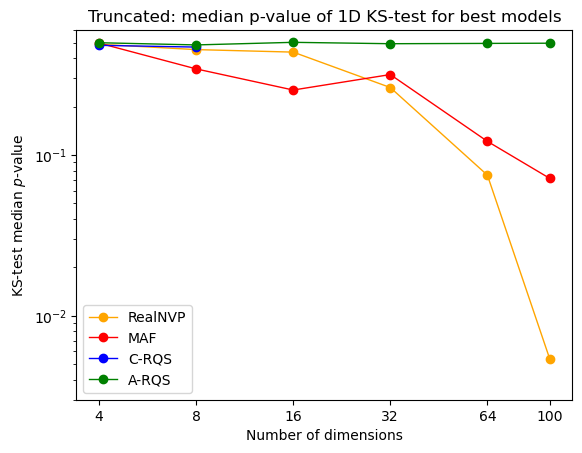

In [96]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_KS[:,0],RealNVPN_truncated_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_KS[:,0],MAFN_truncated_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_KS[:,0],CsplineN_truncated_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_KS[:,0],MsplineN_truncated_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_KS:
        plt.text(i[0]*1.05,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_KS:
        plt.text(i[0]*1.05,i[1]*1.01, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_KS:
        plt.text(i[0]*0.85,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('KS-test median $p$-value')
plt.ylim(0.003,0.6)
plt.title("Truncated: median p-value of 1D KS-test for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_KS_median_truncated.pdf')
plt.show()
plt.close()

### Frobenius-norm

In [97]:
MsplineN_truncated_FN = extract_lines(df_bests_truncated,"MsplineN","corr","frob_norm")
CsplineN_truncated_FN = extract_lines(df_bests_truncated,"CsplineN","corr","frob_norm")
MAFN_truncated_FN = extract_lines(df_bests_truncated,"MAFN","corr","frob_norm")
RealNVPN_truncated_FN = extract_lines(df_bests_truncated,"RealNVPN","corr","frob_norm")

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3853143674.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_FN[:,0],RealNVPN_truncated_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3853143674.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_FN[:,0],RealNVPN_truncated_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3853143674.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argumen

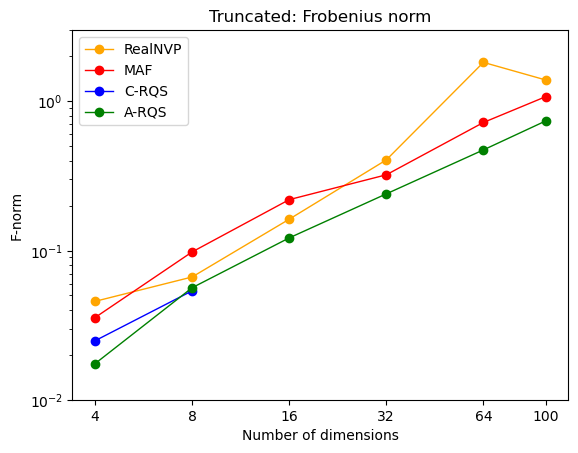

In [98]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_FN[:,0],RealNVPN_truncated_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_FN[:,0],MAFN_truncated_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_FN[:,0],CsplineN_truncated_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_FN[:,0],MsplineN_truncated_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm')
plt.ylim(0.01,3)
plt.title("Truncated: Frobenius norm")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_FN_truncated.pdf')
plt.show()
plt.close()

### Training time

In [99]:
MsplineN_truncated_time = extract_lines(df_bests_truncated,"MsplineN","corr","time").astype(np.float)
CsplineN_truncated_time = extract_lines(df_bests_truncated,"CsplineN","corr","time").astype(np.float)
MAFN_truncated_time = extract_lines(df_bests_truncated,"MAFN","corr","time").astype(np.float)
RealNVPN_truncated_time = extract_lines(df_bests_truncated,"RealNVPN","corr","time").astype(np.float)

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2861439501.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MsplineN_truncated_time = extract_lines(df_bests_truncated,"MsplineN","corr","time").astype(np.float)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\2861439501.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3330546491.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_time[:,0],RealNVPN_truncated_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3330546491.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_truncated_time[:,0],RealNVPN_truncated_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3330546491.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword

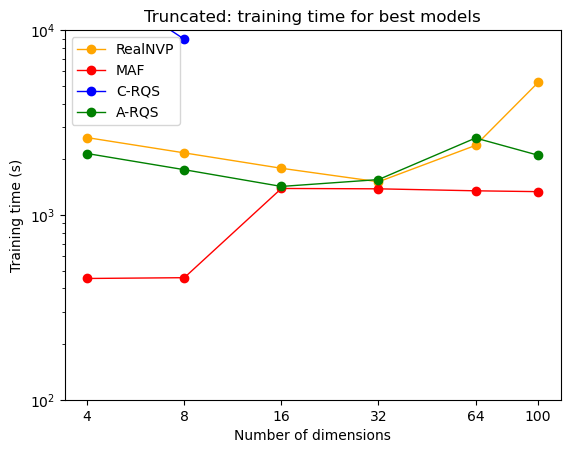

In [100]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_truncated_time[:,0],RealNVPN_truncated_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_truncated_time[:,0],MAFN_truncated_time[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_truncated_time[:,0],CsplineN_truncated_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_truncated_time[:,0],MsplineN_truncated_time[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_truncated_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_truncated_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_truncated_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_truncated_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(100,10000)
plt.title("Truncated: training time for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100], ['4','8','16','32','64','100'])
plt.savefig(paper_fig_dir + 'Best_training_time_truncated.pdf')
plt.show()
plt.close()

## Tables

In [101]:
tmp=df_bests_truncated[5]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

100
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &  bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &  time \\
\midrule
0 &   128-128-128 &           2 &  MsplineN &             8 &         512 &           3.86e-03 &       4.97e-01 &  7.40e-01 &            384 &  2104 \\
4 &   128-128-128 &          10 &      MAFN &             8 &         512 &           2.08e-02 &       7.15e-02 &  1.08e+00 &            304 &  1336 \\
7 &   256-256-256 &           5 &  RealNVPN &             8 &         256 &           2.60e-02 &       5.34e-03 &  1.39e+00 &           1000 &  5208 \\
\bottomrule
\end{tabular}



C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_7396\3173191920.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()


# Main

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import sys
import random
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
tfd = tfp.distributions
tfb = tfp.bijectors
from tensorflow.keras.utils import set_random_seed # type: ignore
import pandas as pd
import pickle
from timeit import default_timer as timer
import traceback
from typing import Dict, Any

sys.path.append('code')
import Bijectors,Distributions,Metrics,MixtureDistributions,Plotters,Trainer,Utils

In [2]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [3]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)
#tf.config.experimental.enable_op_determinism()

In [4]:
def MixtureGaussian(ncomp,ndims,seed=0):
    targ_dist = MixtureDistributions.MixNormal1(ncomp,ndims,seed=seed)
    return targ_dist

In [5]:
### Initialize number of components ###
ncomp=3

### Initialize hyperparameters lists ###
ndims_list=[4]
corr_uncorr_list=["corr"]
regulariser_list=[None]
eps_regularisers=[0]
nsamples_list=[10000]
batch_size_list=[512]
bijectors_list=['MAFN']
activation_list=['relu']
nbijectors_list=[10]
hidden_layers_list=[[256,256,256]]
seeds_list = [0,0]
n_displays=1

### Initialize variables for the neural splines ###
range_min_list=[-5]
spline_knots_list=[8]

### Initialize train hyerparameters ###
ntest_samples=10000
epochs=10
lr_orig=.001
patience=50
min_delta_patience=.0001
lr_change=.2
seed_dist = 0
seed_test = 0

### Initialize output dir ###
mother_output_dir='debug/MAFN/'
try:
    os.mkdir(mother_output_dir)
except:
    print(os.path.abspath(mother_output_dir),'folder already exists')

C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\debug\MAFN folder already exists


In [6]:
### Initialize dictionaries ###
results_dict: Dict[str,Any] = {'run_n': [],'run_seed': [], 'ndims':[],'nsamples':[],'correlation':[],'nbijectors':[],'bijector':[],'activation':[],'spline_knots':[],'range_min':[],'eps_regulariser':[],'regulariser':[],'kl_divergence':[],'ks_test_mean':[],'ks_test_median':[],'ad_test_mean':[],'ad_test_median':[],'Wasserstein_median':[],'Wasserstein_mean':[],'frob_norm':[],'hidden_layers':[],'batch_size':[],'epochs_input':[],'epochs_output':[],'time':[]}
hyperparams_dict: Dict[str,Any] = {'run_n': [],'run_seed': [], 'ndims':[],'nsamples':[],'correlation':[],'nbijectors':[],'bijector':[],'spline_knots':[],'range_min':[],'hidden_layers':[],'batch_size':[],'activation':[],'eps_regulariser':[],'regulariser':[],'dist_seed':[],'test_seed':[]}

### Create 'log' file ####
log_file_name = Utils.create_log_file(mother_output_dir,results_dict)

In [7]:
nf_dists_list_in = []
nf_dists_list_out = []

In [9]:
### Run loop  ###
with tf.device('/device:CPU:0'):
    run_number = 0
    n_runs = len(ndims_list)*len(seeds_list)*len(nsamples_list)*len(corr_uncorr_list)*len(activation_list)*len(eps_regularisers)*len(regulariser_list)*len(bijectors_list)*len(nbijectors_list)*len(spline_knots_list)*len(range_min_list)*len(batch_size_list)*len(hidden_layers_list)
    for ndims in ndims_list:
        print("===========\nGenerating test data for ndims=",ndims,".\n")
        print("===========\n")
        start=timer()
        targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
        X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy()
        end=timer()
        test_data_time=end-start
        print("Test data generated in",test_data_time,"s.\n")
        for seed in seeds_list:
            for nsamples in nsamples_list:
                for activation in activation_list:
                    for eps_regulariser in eps_regularisers:
                        for regulariser in regulariser_list:
                            for bijector_name in bijectors_list:
                                for nbijectors in nbijectors_list:
                                    for spline_knots in spline_knots_list:
                                        for range_min in range_min_list:
                                            for batch_size in batch_size_list:
                                                for hidden_layers in hidden_layers_list:
                                                    for corr in corr_uncorr_list:
                                                        reset_random_seeds(seed)
                                                        run_number = run_number + 1
                                                        results_dict_saved=False
                                                        logger_saved=False
                                                        results_current_saved=False
                                                        details_saved=False
                                                        path_to_results=mother_output_dir+'run_'+str(run_number)+'/'
                                                        to_run=True
                                                        try:    
                                                            os.mkdir(path_to_results)
                                                        except:
                                                            print(path_to_results+' file exists')
                                                            to_run=False
                                                        try:
                                                            if to_run:
                                                                path_to_weights=path_to_results+'weights/'
                                                                try:
                                                                    os.mkdir(path_to_weights)
                                                                except:
                                                                    print(path_to_weights+' file exists')
                                                                print("===========\nGenerating train data for run",run_number,".\n")
                                                                print("===========\n")
                                                                start=timer()
                                                                reset_random_seeds(seed)
                                                                X_data_train=targ_dist.sample(nsamples,seed=seed).numpy()
                                                                if corr == "corr":
                                                                    V = None
                                                                elif corr == "uncorr":
                                                                    V = MixtureDistributions.rot_matrix(X_data_train)
                                                                    X_data_train = MixtureDistributions.transform_data(X_data_train,V)
                                                                    X_data_test = MixtureDistributions.transform_data(X_data_test,V)
                                                                else:
                                                                    V = None
                                                                end=timer()
                                                                train_data_time=end-start
                                                                print("Train data generated in",train_data_time,"s.\n")       
                                                                hllabel='-'.join(str(e) for e in hidden_layers)
                                                                Utils.save_hyperparams(path_to_results,hyperparams_dict,run_number,seed,ndims,nsamples,corr,bijector_name,nbijectors,spline_knots,range_min,hllabel,batch_size,activation,eps_regulariser,regulariser,seed_dist,seed_test)
                                                                print("===========\nRunning",run_number,"/",n_runs,"with hyperparameters:\n",
                                                                      "ndims=",ndims,"\n",
                                                                      "seed=",seed,"\n",
                                                                      "nsamples=",nsamples,"\n",
                                                                      "correlation=",corr,"\n",
                                                                      "activation=",activation,"\n",
                                                                      "eps_regulariser=",eps_regulariser,"\n",
                                                                      "regulariser=",regulariser,"\n",
                                                                      "bijector=",bijector_name,"\n",
                                                                      "nbijectors=",nbijectors,"\n",
                                                                      "spline_knots=",spline_knots,"\n",
                                                                      "range_min=",range_min,"\n",
                                                                      "batch_size=",batch_size,"\n",
                                                                      "hidden_layers=",hidden_layers,
                                                                      "epocs_input=",epochs,
                                                                      "\n===========\n")
                                                                reset_random_seeds(seed)
                                                                bijector=Bijectors.ChooseBijector(bijector_name,ndims,spline_knots,nbijectors,range_min,hidden_layers,activation,regulariser,eps_regulariser)
                                                                Utils.save_bijector_info(bijector,path_to_results)
                                                                base_dist=Distributions.gaussians(ndims)
                                                                nf_dist=tfd.TransformedDistribution(base_dist,bijector)
                                                                start=timer()
                                                                print("Training model.\n")
                                                                epochs_input = epochs
                                                                lr=lr_orig
                                                                n_displays=1
                                                                print("Train first sample:",X_data_train[0])
                                                                reset_random_seeds(seed)
                                                                history=Trainer.graph_execution(ndims,nf_dist, X_data_train,epochs, batch_size, n_displays,path_to_results,load_weights=True,load_weights_path=path_to_weights,lr=lr,patience=patience,min_delta_patience=min_delta_patience,reduce_lr_factor=lr_change,seed=seed)
                                                                t_losses_all=list(history.history['loss'])
                                                                v_losses_all=list(history.history['val_loss'])
                                                                end=timer()
                                                                epochs_output = len(t_losses_all)
                                                                training_time=end-start
                                                                print("Model trained in",training_time,"s.\n")
                                                                nf_dists_list_in.append(nf_dist)
                                                                #continue
                                                                start=timer()
                                                                print("===========\nComputing predictions\n===========\n")
                                                                #with tf.device('/device:CPU:0'):
                                                                if V is not None:
                                                                    X_data_train = MixtureDistributions.inverse_transform_data(X_data_train,V)
                                                                    X_data_test = MixtureDistributions.inverse_transform_data(X_data_test,V)
                                                                #reload_best
                                                                reset_random_seeds(seed)
                                                                nf_dist,_=Utils.load_model(nf_dist,path_to_results,ndims,lr=.000001)
                                                                nf_dists_list_out.append(nf_dist)
                                                                logprob_nf=nf_dist.log_prob(X_data_test).numpy()
                                                                pickle_logprob_nf=open(path_to_results+'logprob_nf.pcl', 'wb')
                                                                pickle.dump(logprob_nf, pickle_logprob_nf, protocol=4)
                                                                pickle_logprob_nf.close()
                                                                X_data_nf=Utils.nf_sample_save(nf_dist,path_to_results,sample_size=ntest_samples,rot=V,iter_size=10000,seed=seed)
                                                                print("Test first sample:",X_data_test[0])
                                                                print("NF first sample:",X_data_nf[0])
                                                                kl_divergence,ks_median,ks_mean,ad_mean,ad_median,w_distance_median,w_distance_mean,frob_norm,nf_corr,target_corr=Metrics.ComputeMetrics(X_data_test,X_data_nf)
                                                                results_dict=Utils.ResultsToDict(results_dict,run_number,seed,ndims,nsamples,corr,bijector_name,nbijectors,activation,spline_knots,range_min,kl_divergence,ks_mean,ks_median,ad_mean,ad_median,w_distance_median,w_distance_mean,frob_norm,hllabel,batch_size,eps_regulariser,regulariser,epochs_input,epochs_output,training_time)
                                                                results_dict_saved=True
                                                                print("Results dict saved")
                                                                Utils.logger(log_file_name,results_dict)
                                                                logger_saved=True
                                                                print("Logger saved")
                                                                Utils.results_current(path_to_results,results_dict)
                                                                results_current_saved=True
                                                                print("Results saved")
                                                                Utils.save_details_json(hyperparams_dict,results_dict,t_losses_all,v_losses_all,path_to_results)
                                                                details_saved=True
                                                                print("Details saved")
                                                                Plotters.train_plotter(t_losses_all,v_losses_all,path_to_results)
                                                                corner_start=timer()
                                                                #Plotters.cornerplotter(X_data_test,X_data_nf,path_to_results,ndims,norm=True)
                                                                #Plotters.marginal_plot(X_data_test,X_data_nf,path_to_results,ndims)
                                                                #Plotters.sample_plotter(X_data_test,nf_dist,path_to_results)
                                                                end=timer()
                                                                predictions_time=end-start
                                                                print("Model predictions computed in",predictions_time,"s.\n")
                                                            else:
                                                                print("===========\nRun",run_number,"/",n_runs,"already exists. Skipping it.\n")
                                                                print("===========\n")
                                                        except Exception as ex:
                                                            # Get current system exception
                                                            ex_type, ex_value, ex_traceback = sys.exc_info()
                                                            # Extract unformatter stack traces as tuples
                                                            trace_back = traceback.extract_tb(ex_traceback)
                                                            # Format stacktrace
                                                            stack_trace = list()
                                                            for trace in trace_back:
                                                                stack_trace.append("File : %s , Line : %d, Func.Name : %s, Message : %s" % (trace[0], trace[1], trace[2], trace[3]))
                                                            if not results_dict_saved:
                                                                results_dict=Utils.ResultsToDict(results_dict,run_number,seed,ndims,nsamples,corr,bijector_name,nbijectors,activation,spline_knots,range_min,"nan","nan","nan","nan","nan","nan","nan","nan",hllabel,batch_size,eps_regulariser,regulariser,epochs_input,"nan","nan")
                                                            if not logger_saved:
                                                                Utils.logger(log_file_name,results_dict)
                                                            if not results_current_saved:
                                                                Utils.results_current(path_to_results,results_dict)
                                                            if not details_saved:
                                                                try:
                                                                    Utils.save_details_json(hyperparams_dict,results_dict,t_losses_all,v_losses_all,path_to_results)
                                                                except:
                                                                    Utils.save_details_json(hyperparams_dict,results_dict,None,None,path_to_results)
                                                            print("===========\nRun failed\n")
                                                            print("Exception type : %s " % ex_type.__name__)
                                                            print("Exception message : %s" %ex_value)
                                                            print("Stack trace : %s" %stack_trace)
                                                            print("===========\n")   
    results_frame=pd.DataFrame(results_dict)
    results_frame.to_csv(mother_output_dir+'results_last_run.txt',index=False)
    print("Everything done.")

Generating test data for ndims= 4 .


Test data generated in 0.044685299999997596 s.

Generating train data for run 1 .


Train data generated in 0.03511999999999915 s.

Running 1 / 2 with hyperparameters:
 ndims= 4 
 seed= 0 
 nsamples= 10000 
 correlation= corr 
 activation= relu 
 eps_regulariser= 0 
 regulariser= None 
 bijector= MAFN 
 nbijectors= 10 
 spline_knots= 8 
 range_min= -5 
 batch_size= 512 
 hidden_layers= [256, 256, 256] epocs_input= 10 

Training model.

Train first sample: [4.2423981  7.12590057 6.06101175 5.06947111]
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
####### log_prob####
KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.subtract_21/Sub:0', description="created by layer 'tf.math.subtract_21'")
Not weights found. Training from scratch
Epoch 1/10

 Epoch 1/10 
	 loss: 30.7350, val_loss: 14.5821

Epoch 1: val_loss improv

C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value floored: true value smaller than 0.001
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]
C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value capped: true value larger than 0.25
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]


Results dict saved
Logger saved
Results saved
Details saved
Model predictions computed in 8.719558699999993 s.

Generating train data for run 2 .


Train data generated in 0.04281090000000631 s.

Running 2 / 2 with hyperparameters:
 ndims= 4 
 seed= 0 
 nsamples= 10000 
 correlation= corr 
 activation= relu 
 eps_regulariser= 0 
 regulariser= None 
 bijector= MAFN 
 nbijectors= 10 
 spline_knots= 8 
 range_min= -5 
 batch_size= 512 
 hidden_layers= [256, 256, 256] epocs_input= 10 

Training model.

Train first sample: [4.2423981  7.12590057 6.06101175 5.06947111]
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_13'), name='input_13', description="created by layer 'input_13'")
####### log_prob####
KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.subtract_65/Sub:0', description="created by layer 'tf.math.subtract_65'")
Not weights found. Training from scratch
Epoch 1/10

 Epoch 1/10 
	 loss: 30.7350, val_loss: 14.5

C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value floored: true value smaller than 0.001
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]
C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value capped: true value larger than 0.25
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]


Results dict saved
Logger saved
Results saved
Details saved
Model predictions computed in 9.600121000000001 s.

Everything done.


In [10]:
### Run loop  ###
run_number = 2
n_runs = len(ndims_list)*len(seeds_list)*len(nsamples_list)*len(corr_uncorr_list)*len(activation_list)*len(eps_regularisers)*len(regulariser_list)*len(bijectors_list)*len(nbijectors_list)*len(spline_knots_list)*len(range_min_list)*len(batch_size_list)*len(hidden_layers_list)
for ndims in ndims_list:
    print("===========\nGenerating test data for ndims=",ndims,".\n")
    print("===========\n")
    start=timer()
    targ_dist=MixtureGaussian(ncomp,ndims,seed=seed_dist)
    X_data_test=targ_dist.sample(ntest_samples,seed=seed_test).numpy()
    end=timer()
    test_data_time=end-start
    print("Test data generated in",test_data_time,"s.\n")
    for seed in seeds_list:
        for nsamples in nsamples_list:
            for activation in activation_list:
                for eps_regulariser in eps_regularisers:
                    for regulariser in regulariser_list:
                        for bijector_name in bijectors_list:
                            for nbijectors in nbijectors_list:
                                for spline_knots in spline_knots_list:
                                    for range_min in range_min_list:
                                        for batch_size in batch_size_list:
                                            for hidden_layers in hidden_layers_list:
                                                for corr in corr_uncorr_list:
                                                    reset_random_seeds(seed)
                                                    run_number = run_number + 1
                                                    results_dict_saved=False
                                                    logger_saved=False
                                                    results_current_saved=False
                                                    details_saved=False
                                                    path_to_results=mother_output_dir+'run_'+str(run_number)+'/'
                                                    to_run=True
                                                    try:    
                                                        os.mkdir(path_to_results)
                                                    except:
                                                        print(path_to_results+' file exists')
                                                        to_run=False
                                                    try:
                                                        if to_run:
                                                            path_to_weights=path_to_results+'weights/'
                                                            try:
                                                                os.mkdir(path_to_weights)
                                                            except:
                                                                print(path_to_weights+' file exists')
                                                            print("===========\nGenerating train data for run",run_number,".\n")
                                                            print("===========\n")
                                                            start=timer()
                                                            reset_random_seeds(seed)
                                                            X_data_train=targ_dist.sample(nsamples,seed=seed).numpy()
                                                            if corr == "corr":
                                                                V = None
                                                            elif corr == "uncorr":
                                                                V = MixtureDistributions.rot_matrix(X_data_train)
                                                                X_data_train = MixtureDistributions.transform_data(X_data_train,V)
                                                                X_data_test = MixtureDistributions.transform_data(X_data_test,V)
                                                            else:
                                                                V = None
                                                            end=timer()
                                                            train_data_time=end-start
                                                            print("Train data generated in",train_data_time,"s.\n")       
                                                            hllabel='-'.join(str(e) for e in hidden_layers)
                                                            Utils.save_hyperparams(path_to_results,hyperparams_dict,run_number,seed,ndims,nsamples,corr,bijector_name,nbijectors,spline_knots,range_min,hllabel,batch_size,activation,eps_regulariser,regulariser,seed_dist,seed_test)
                                                            print("===========\nRunning",run_number,"/",n_runs,"with hyperparameters:\n",
                                                                  "ndims=",ndims,"\n",
                                                                  "seed=",seed,"\n",
                                                                  "nsamples=",nsamples,"\n",
                                                                  "correlation=",corr,"\n",
                                                                  "activation=",activation,"\n",
                                                                  "eps_regulariser=",eps_regulariser,"\n",
                                                                  "regulariser=",regulariser,"\n",
                                                                  "bijector=",bijector_name,"\n",
                                                                  "nbijectors=",nbijectors,"\n",
                                                                  "spline_knots=",spline_knots,"\n",
                                                                  "range_min=",range_min,"\n",
                                                                  "batch_size=",batch_size,"\n",
                                                                  "hidden_layers=",hidden_layers,
                                                                  "epocs_input=",epochs,
                                                                  "\n===========\n")
                                                            reset_random_seeds(seed)
                                                            bijector=Bijectors.ChooseBijector(bijector_name,ndims,spline_knots,nbijectors,range_min,hidden_layers,activation,regulariser,eps_regulariser)
                                                            Utils.save_bijector_info(bijector,path_to_results)
                                                            base_dist=Distributions.gaussians(ndims)
                                                            nf_dist=tfd.TransformedDistribution(base_dist,bijector)
                                                            start=timer()
                                                            print("Training model.\n")
                                                            epochs_input = epochs
                                                            lr=lr_orig
                                                            n_displays=1
                                                            print("Train first sample:",X_data_train[0])
                                                            reset_random_seeds(seed)
                                                            history=Trainer.graph_execution(ndims,nf_dist, X_data_train,epochs, batch_size, n_displays,path_to_results,load_weights=True,load_weights_path=path_to_weights,lr=lr,patience=patience,min_delta_patience=min_delta_patience,reduce_lr_factor=lr_change,seed=seed)
                                                            t_losses_all=list(history.history['loss'])
                                                            v_losses_all=list(history.history['val_loss'])
                                                            end=timer()
                                                            epochs_output = len(t_losses_all)
                                                            training_time=end-start
                                                            print("Model trained in",training_time,"s.\n")
                                                            nf_dists_list_in.append(nf_dist)
                                                            #continue
                                                            start=timer()
                                                            print("===========\nComputing predictions\n===========\n")
                                                            #with tf.device('/device:CPU:0'):
                                                            if V is not None:
                                                                X_data_train = MixtureDistributions.inverse_transform_data(X_data_train,V)
                                                                X_data_test = MixtureDistributions.inverse_transform_data(X_data_test,V)
                                                            #reload_best
                                                            reset_random_seeds(seed)
                                                            nf_dist,_=Utils.load_model(nf_dist,path_to_results,ndims,lr=.000001)
                                                            nf_dists_list_out.append(nf_dist)
                                                            logprob_nf=nf_dist.log_prob(X_data_test).numpy()
                                                            pickle_logprob_nf=open(path_to_results+'logprob_nf.pcl', 'wb')
                                                            pickle.dump(logprob_nf, pickle_logprob_nf, protocol=4)
                                                            pickle_logprob_nf.close()
                                                            X_data_nf=Utils.nf_sample_save(nf_dist,path_to_results,sample_size=ntest_samples,rot=V,iter_size=10000,seed=seed)
                                                            print("Test first sample:",X_data_test[0])
                                                            print("NF first sample:",X_data_nf[0])
                                                            kl_divergence,ks_median,ks_mean,ad_mean,ad_median,w_distance_median,w_distance_mean,frob_norm,nf_corr,target_corr=Metrics.ComputeMetrics(X_data_test,X_data_nf)
                                                            results_dict=Utils.ResultsToDict(results_dict,run_number,seed,ndims,nsamples,corr,bijector_name,nbijectors,activation,spline_knots,range_min,kl_divergence,ks_mean,ks_median,ad_mean,ad_median,w_distance_median,w_distance_mean,frob_norm,hllabel,batch_size,eps_regulariser,regulariser,epochs_input,epochs_output,training_time)
                                                            results_dict_saved=True
                                                            print("Results dict saved")
                                                            Utils.logger(log_file_name,results_dict)
                                                            logger_saved=True
                                                            print("Logger saved")
                                                            Utils.results_current(path_to_results,results_dict)
                                                            results_current_saved=True
                                                            print("Results saved")
                                                            Utils.save_details_json(hyperparams_dict,results_dict,t_losses_all,v_losses_all,path_to_results)
                                                            details_saved=True
                                                            print("Details saved")
                                                            Plotters.train_plotter(t_losses_all,v_losses_all,path_to_results)
                                                            corner_start=timer()
                                                            #Plotters.cornerplotter(X_data_test,X_data_nf,path_to_results,ndims,norm=True)
                                                            #Plotters.marginal_plot(X_data_test,X_data_nf,path_to_results,ndims)
                                                            #Plotters.sample_plotter(X_data_test,nf_dist,path_to_results)
                                                            end=timer()
                                                            predictions_time=end-start
                                                            print("Model predictions computed in",predictions_time,"s.\n")
                                                        else:
                                                            print("===========\nRun",run_number,"/",n_runs,"already exists. Skipping it.\n")
                                                            print("===========\n")
                                                    except Exception as ex:
                                                        # Get current system exception
                                                        ex_type, ex_value, ex_traceback = sys.exc_info()
                                                        # Extract unformatter stack traces as tuples
                                                        trace_back = traceback.extract_tb(ex_traceback)
                                                        # Format stacktrace
                                                        stack_trace = list()
                                                        for trace in trace_back:
                                                            stack_trace.append("File : %s , Line : %d, Func.Name : %s, Message : %s" % (trace[0], trace[1], trace[2], trace[3]))
                                                        if not results_dict_saved:
                                                            results_dict=Utils.ResultsToDict(results_dict,run_number,seed,ndims,nsamples,corr,bijector_name,nbijectors,activation,spline_knots,range_min,"nan","nan","nan","nan","nan","nan","nan","nan",hllabel,batch_size,eps_regulariser,regulariser,epochs_input,"nan","nan")
                                                        if not logger_saved:
                                                            Utils.logger(log_file_name,results_dict)
                                                        if not results_current_saved:
                                                            Utils.results_current(path_to_results,results_dict)
                                                        if not details_saved:
                                                            try:
                                                                Utils.save_details_json(hyperparams_dict,results_dict,t_losses_all,v_losses_all,path_to_results)
                                                            except:
                                                                Utils.save_details_json(hyperparams_dict,results_dict,None,None,path_to_results)
                                                        print("===========\nRun failed\n")
                                                        print("Exception type : %s " % ex_type.__name__)
                                                        print("Exception message : %s" %ex_value)
                                                        print("Stack trace : %s" %stack_trace)
                                                        print("===========\n")   
results_frame=pd.DataFrame(results_dict)
results_frame.to_csv(mother_output_dir+'results_last_run.txt',index=False)
print("Everything done.")

Generating test data for ndims= 4 .


Test data generated in 0.06226599999999394 s.

Generating train data for run 3 .


Train data generated in 0.03404280000000881 s.

Running 3 / 2 with hyperparameters:
 ndims= 4 
 seed= 0 
 nsamples= 10000 
 correlation= corr 
 activation= relu 
 eps_regulariser= 0 
 regulariser= None 
 bijector= MAFN 
 nbijectors= 10 
 spline_knots= 8 
 range_min= -5 
 batch_size= 512 
 hidden_layers= [256, 256, 256] epocs_input= 10 

Training model.

Train first sample: [4.2423981  6.37637212 6.06101175 5.06947111]
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_25'), name='input_25', description="created by layer 'input_25'")
####### log_prob####
KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.subtract_109/Sub:0', description="created by layer 'tf.math.subtract_109'")
Not weights found. Training from scratch
Epoch 1/10

 Epoch 1/10 
	 loss: 31.0278, val_loss: 14.5503

Epoch 1: val_loss im

C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value floored: true value smaller than 0.001
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]
C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value capped: true value larger than 0.25
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]


Results dict saved
Logger saved
Results saved
Details saved
Model predictions computed in 7.066490200000004 s.

Generating train data for run 4 .


Train data generated in 0.039613299999984974 s.

Running 4 / 2 with hyperparameters:
 ndims= 4 
 seed= 0 
 nsamples= 10000 
 correlation= corr 
 activation= relu 
 eps_regulariser= 0 
 regulariser= None 
 bijector= MAFN 
 nbijectors= 10 
 spline_knots= 8 
 range_min= -5 
 batch_size= 512 
 hidden_layers= [256, 256, 256] epocs_input= 10 

Training model.

Train first sample: [4.2423981  6.37637212 6.06101175 5.06947111]
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_37'), name='input_37', description="created by layer 'input_37'")
####### log_prob####
KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.subtract_153/Sub:0', description="created by layer 'tf.math.subtract_153'")
Not weights found. Training from scratch
Epoch 1/10

 Epoch 1/10 
	 loss: 31.0278, val_loss: 1

C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value floored: true value smaller than 0.001
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]
C:\Users\Riccardo Torre\Dropbox\Work\09_Resources\Git\GitHub\NormalizingFlowsHD-2\Riccardo\code\Metrics.py:160: UserWarning: p-value capped: true value larger than 0.25
  p_val=anderson_ksamp([x_estimated[:,dim], batch_test[:,dim]])[2]


Results dict saved
Logger saved
Results saved
Details saved
Model predictions computed in 7.41992769999996 s.

Everything done.


In [12]:
nf_dists_list_out[0].trainable_variables

(<tf.Variable 'dense_3/kernel:0' shape=(256, 8) dtype=float32, numpy=
 array([[-0.        , -0.        ,  0.10720158, ..., -0.0827304 ,
          0.02985817,  0.09916186],
        [ 0.        , -0.        , -0.11560814, ...,  0.1318303 ,
         -0.07960814,  0.09124579],
        [ 0.        , -0.        , -0.11839663, ...,  0.07956894,
          0.06862737,  0.04634258],
        ...,
        [-0.        , -0.        ,  0.        , ..., -0.        ,
         -0.11204113,  0.07536657],
        [-0.        , -0.        ,  0.        , ...,  0.        ,
         -0.12973367,  0.03398971],
        [ 0.        ,  0.        , -0.        , ...,  0.        ,
          0.02419907,  0.00109001]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(8,) dtype=float32, numpy=
 array([0.01255242, 0.00920925, 0.00682444, 0.00574686, 0.00997529,
        0.00990819, 0.00856893, 0.00607464], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(4, 256) dtype=float32, numpy=
 array([[-0.06320249, -0.

In [13]:
nf_dists_list_out[1].trainable_variables

(<tf.Variable 'dense_3/kernel:0' shape=(256, 8) dtype=float32, numpy=
 array([[-0.        , -0.        ,  0.10720158, ..., -0.0827304 ,
          0.02985817,  0.09916186],
        [ 0.        , -0.        , -0.11560814, ...,  0.1318303 ,
         -0.07960814,  0.09124579],
        [ 0.        , -0.        , -0.11839663, ...,  0.07956894,
          0.06862737,  0.04634258],
        ...,
        [-0.        , -0.        ,  0.        , ..., -0.        ,
         -0.11204113,  0.07536657],
        [-0.        , -0.        ,  0.        , ...,  0.        ,
         -0.12973367,  0.03398971],
        [ 0.        ,  0.        , -0.        , ...,  0.        ,
          0.02419907,  0.00109001]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(8,) dtype=float32, numpy=
 array([0.01255242, 0.00920925, 0.00682444, 0.00574686, 0.00997529,
        0.00990819, 0.00856893, 0.00607464], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(4, 256) dtype=float32, numpy=
 array([[-0.06320249, -0.

In [18]:
sample = []
set_random_seed(0)
for i in range(3):
    sample.append(nf_dists_list_in[0].sample(10,seed=0))
sample

[<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
 array([[4.087527 , 9.099692 , 6.558752 , 6.1499176],
        [6.8729405, 4.448292 , 3.7051532, 6.4244256],
        [5.2254753, 6.1466694, 5.3240395, 5.567064 ],
        [4.3482037, 6.045158 , 7.026365 , 6.2468653],
        [4.352396 , 4.0598016, 4.8727264, 6.0857363],
        [4.4578695, 4.4949875, 4.61279  , 5.6097836],
        [3.9629564, 5.5624075, 6.9108615, 5.5364075],
        [4.4981666, 6.07916  , 9.151524 , 6.0167856],
        [4.361727 , 6.138248 , 4.6413865, 6.1372337],
        [4.4093223, 9.049372 , 7.147332 , 5.9734864]], dtype=float32)>,
 <tf.Tensor: shape=(10, 4), dtype=float32, numpy=
 array([[ 4.55985  ,  6.746113 ,  2.416549 ,  5.7835097],
        [ 4.503824 ,  4.1288133,  2.846813 ,  5.9718676],
        [ 4.116027 ,  7.5979424,  6.2957497,  5.5655565],
        [ 4.4671135,  8.981958 ,  5.05769  ,  5.5010905],
        [ 4.3699627,  6.047117 ,  2.9140346,  5.0463204],
        [ 4.354287 ,  9.0888195,  2.4806397,  4.8360

In [21]:
sample = []
set_random_seed(0)
for i in range(3):
    sample.append(nf_dists_list_in[1].sample(10,seed=0))
sample

[<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
 array([[4.1223793, 9.181046 , 6.353579 , 5.962291 ],
        [6.706013 , 4.1714516, 3.2623308, 6.6545906],
        [5.2790184, 6.017379 , 5.208036 , 5.4611053],
        [4.350789 , 5.73131  , 6.8824334, 6.262477 ],
        [4.3331823, 3.7778213, 4.745472 , 6.2040195],
        [4.443042 , 4.30378  , 4.5082235, 5.6246276],
        [3.9659429, 5.5840006, 6.746603 , 5.595963 ],
        [4.4795785, 5.758682 , 9.103703 , 6.062969 ],
        [4.358735 , 5.908575 , 4.5027595, 6.085123 ],
        [4.421426 , 9.032325 , 7.167489 , 5.74378  ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 4), dtype=float32, numpy=
 array([[ 4.502991 ,  6.8692694,  2.1981757,  5.822977 ],
        [ 4.483065 ,  3.923318 ,  2.572829 ,  6.0212436],
        [ 4.1314197,  7.639933 ,  6.1464825,  5.451008 ],
        [ 4.4776077,  9.06207  ,  5.093575 ,  5.2709517],
        [ 4.423689 ,  6.051695 ,  2.7359858,  4.9280453],
        [ 4.495466 ,  9.788909 ,  2.5885699,  4.7284